In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_1 = pd.read_csv("/content/prosperLoanData (1).csv", sep=',', quotechar='"', encoding='utf-8')


In [10]:
data = data_1.copy()


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# **DATA PREPROCESSING**

In [12]:
data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [13]:
data.tail()

ListingKey  ListingNumber            ListingCreationDate  \
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
113932      0.22354        0.1864       0.1764                  0.16490   
113933      0.13220        0.1110       0.1010                  0.10070   
113934      0.23984        0.2150       0.2050                  0.18828   
113935      0.28408        0.2605       0.2505                  0.24450   
113936      0.13189        0.1039       0.0939                  0.09071   

        EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
113932         0.0699          0.09500                      4.0   
113933         0.0200          0.08070                      6.0   
113934         0.1025          0.08578                      3.0   
113935         0.0850          0.15950                      4.0   
113936         0.0299          0.06081                      6.0   

       ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
113932                     C           5.0                          1   
113933                     A           8.0                          7   
113934                     D           3.0                          1   
113935                     C           5.0                          2   
113936                     A           7.0                          1   

       BorrowerState               Occupation EmploymentStatus  \
113932            IL  Food Service Management         Employed   
113933            PA             Professional         Employed   
113934            TX                    Other         Employed   
113935            GA             Food Service        Full-time   
113936            NY                Professor         Employed   

        EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
113932                     246.0                 True             False   
113933                      21.0                 True             False   
113934                      84.0                 True             False   
113935                      94.0                 True             False   
113936                     244.0                False             False   

       GroupKey     DateCreditPulled  CreditScoreRangeLower  \
113932      NaN  2013-04-14 05:54:58                  700.0   
113933      NaN  2011-11-03 20:42:53                  700.0   
113934      NaN  2013-12-13 05:49:15                  700.0   
113935      NaN  2011-11-14 13:18:24                  680.0   
113936      NaN  2014-01-15 09:27:40                  680.0   

        CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
113932                  719.0     1997-09-01 00:00:00                 9.0   
113933                  719.0     1992-01-17 00:00:00                14.0   
113934                  719.0     2002-02-25 00:00:00                12.0   
113935                  699.0     1993-12-01 00:00:00                11.0   
113936                  699.0     1995-01-01 00:00:00                10.0   

        OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
113932              9.0           

In [14]:
data.shape

(113937, 81)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [16]:
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [17]:
data.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [18]:
data.CreditGrade.value_counts()

CreditGrade
C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: count, dtype: int64

In [19]:
#data.ClosedDate.value_counts()

In [20]:
#data.BorrowerAPR.value_counts()

In [21]:
#data.EstimatedEffectiveYield.value_counts()

In [22]:
#data.EstimatedLoss.value_counts()

In [23]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Filter columns where missing percentage is more than 80%
columns_with_high_missing_values = missing_percentage[missing_percentage > 80].index.tolist()

print("Columns with more than 80% missing values:")
print(columns_with_high_missing_values)


Columns with more than 80% missing values:
['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber']


In [24]:
# these columns are getting morethan 80% missing values so these columns are suitable for imputing , i drop these columns
'''columns_to_drop = ['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
                   'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
                   'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
                   'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
                   'LoanFirstDefaultedCycleNumber']

data.drop(columns_to_drop, axis=1, inplace=True)'''


"columns_to_drop = ['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',\n                   'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',\n                   'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',\n                   'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',\n                   'LoanFirstDefaultedCycleNumber']\n\ndata.drop(columns_to_drop, axis=1, inplace=True)"

In [25]:
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [26]:
len(data.isnull().sum())

81

In [27]:
data.shape

(113937, 81)

In [28]:
data.CreditGrade.unique()


array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [29]:
data.CreditGrade.value_counts()

CreditGrade
C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: count, dtype: int64

In [30]:
data['CreditGrade'].fillna(data['CreditGrade'].mode()[0], inplace=True)


In [31]:
data.CreditGrade.value_counts()

CreditGrade
C     90633
D      5153
B      4389
AA     3509
HR     3508
A      3315
E      3289
NC      141
Name: count, dtype: int64

In [32]:
#data.drop("ClosedDate", axis=1, inplace=True)


In [33]:
data.dropna(subset=['BorrowerAPR'], inplace=True)



In [34]:
print(data.EstimatedEffectiveYield.mean())
print(data.EstimatedEffectiveYield.median())

0.1686614749036569
0.1615


**IMMPUTATION**

In [35]:
data['EstimatedEffectiveYield'].fillna(data['EstimatedEffectiveYield'].median(), inplace=True)

In [36]:
print(data.EstimatedLoss.mean())
print(data.EstimatedLoss.median())

0.08030585836682262
0.0724


In [37]:
data.EstimatedLoss.head()

0       NaN
1    0.0249
2       NaN
3    0.0249
4    0.0925
Name: EstimatedLoss, dtype: float64

In [38]:
data['EstimatedLoss'].fillna(data['EstimatedLoss'].median(), inplace=True)

In [39]:
data.EstimatedReturn.head(10)

0        NaN
1    0.05470
2        NaN
3    0.06000
4    0.09066
5    0.07077
6    0.11070
7    0.09840
8    0.04231
9    0.04231
Name: EstimatedReturn, dtype: float64

In [40]:
print(data.EstimatedLoss.mean())
print(data.EstimatedLoss.median())
print(data.EstimatedLoss.mode())


0.07828907051056955
0.0724
0    0.0724
Name: EstimatedLoss, dtype: float64


In [41]:
data['EstimatedLoss'].fillna(data['EstimatedLoss'].median(), inplace=True)

In [42]:
data.EstimatedReturn.head()

0        NaN
1    0.05470
2        NaN
3    0.06000
4    0.09066
Name: EstimatedReturn, dtype: float64

In [43]:
print(data.EstimatedReturn.mean())
print(data.EstimatedReturn.median())
print(data.EstimatedReturn.mode())

0.09606829611209976
0.0917
0    0.1246
Name: EstimatedReturn, dtype: float64


In [44]:
data['EstimatedReturn'].fillna(data['EstimatedReturn'].median(), inplace=True)

In [45]:
data['ProsperRating (numeric)'].head()

0    NaN
1    6.0
2    NaN
3    6.0
4    3.0
Name: ProsperRating (numeric), dtype: float64

In [46]:
print(data['ProsperRating (numeric)'].mean())
print(data['ProsperRating (numeric)'].median())
print(data['ProsperRating (numeric)'].mode())

4.07224258423391
4.0
0    4.0
Name: ProsperRating (numeric), dtype: float64


In [47]:
data['ProsperRating (numeric)'].fillna(data['ProsperRating (numeric)'].median(), inplace=True)

In [48]:
data['ProsperRating (Alpha)'].head()

0    NaN
1      A
2    NaN
3      A
4      D
Name: ProsperRating (Alpha), dtype: object

In [49]:
data['ProsperRating (Alpha)'].value_counts()

ProsperRating (Alpha)
C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: count, dtype: int64

In [50]:
data['ProsperRating (Alpha)'].fillna(data['ProsperRating (Alpha)'].mode()[0], inplace=True)


In [51]:
data.ProsperScore.head(10)

0     NaN
1     7.0
2     NaN
3     9.0
4     4.0
5    10.0
6     2.0
7     4.0
8     9.0
9    11.0
Name: ProsperScore, dtype: float64

In [52]:
print(data.ProsperScore.mean())
print(data.ProsperScore.median())
print(data.ProsperScore.mode())

5.950066585742402
6.0
0    4.0
Name: ProsperScore, dtype: float64


In [53]:
data['ProsperScore'].fillna(data['ProsperScore'].median(), inplace=True)

In [54]:
data.BorrowerState.value_counts()

BorrowerState
CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: count, dtype: int64

In [55]:
data['BorrowerState'].fillna(data['BorrowerState'].mode()[0], inplace=True)


In [56]:
data.Occupation.value_counts()

Occupation
Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical

In [57]:
data['Occupation'].fillna(data['Occupation'].mode()[0], inplace=True)

In [58]:
data.EmploymentStatus.value_counts()

EmploymentStatus
Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: count, dtype: int64

In [59]:
data['EmploymentStatus'].fillna(data['EmploymentStatus'].mode()[0], inplace=True)

In [60]:
data.EmploymentStatusDuration.head()

0      2.0
1     44.0
2      NaN
3    113.0
4     44.0
Name: EmploymentStatusDuration, dtype: float64

In [61]:
print(data.EmploymentStatusDuration.mean())
print(data.EmploymentStatusDuration.median())
print(data.EmploymentStatusDuration.mode())

96.07158175934984
67.0
0    0.0
Name: EmploymentStatusDuration, dtype: float64


In [62]:
data['EmploymentStatusDuration'].fillna(data['EmploymentStatusDuration'].median(), inplace=True)

In [63]:
data.CreditScoreRangeLower.head()

0    640.0
1    680.0
2    480.0
3    800.0
4    680.0
Name: CreditScoreRangeLower, dtype: float64

In [64]:
print(data.CreditScoreRangeLower.mean())
print(data.CreditScoreRangeLower.median())
print(data.CreditScoreRangeLower.mode())

685.5677306653962
680.0
0    680.0
Name: CreditScoreRangeLower, dtype: float64


In [65]:
data['CreditScoreRangeLower'].fillna(data['CreditScoreRangeLower'].median(), inplace=True)

In [66]:
data.CreditScoreRangeUpper.head()

0    659.0
1    699.0
2    499.0
3    819.0
4    699.0
Name: CreditScoreRangeUpper, dtype: float64

In [67]:
print(data.CreditScoreRangeUpper.mean())
print(data.CreditScoreRangeUpper.median())
print(data.CreditScoreRangeUpper.mode())

704.5677306653962
699.0
0    699.0
Name: CreditScoreRangeUpper, dtype: float64


In [68]:
data['CreditScoreRangeUpper'].fillna(method='ffill', inplace=True)


In [69]:
data.FirstRecordedCreditLine.head()

0    2001-10-11 00:00:00
1    1996-03-18 00:00:00
2    2002-07-27 00:00:00
3    1983-02-28 00:00:00
4    2004-02-20 00:00:00
Name: FirstRecordedCreditLine, dtype: object

In [70]:
data.drop(columns=['FirstRecordedCreditLine'], inplace=True)

In [71]:
data.CurrentCreditLines.head()

0     5.0
1    14.0
2     NaN
3     5.0
4    19.0
Name: CurrentCreditLines, dtype: float64

In [72]:
print(data.CurrentCreditLines.mean())
print(data.CurrentCreditLines.median())
print(data.CurrentCreditLines.mode())

10.317192216903502
10.0
0    8.0
Name: CurrentCreditLines, dtype: float64


In [73]:
data['CurrentCreditLines'].fillna(data['CurrentCreditLines'].median(), inplace=True)

In [74]:
data.OpenCreditLines.head()

0     4.0
1    14.0
2     NaN
3     5.0
4    19.0
Name: OpenCreditLines, dtype: float64

In [75]:
print(data.OpenCreditLines.mean())
print(data.OpenCreditLines.median())
print(data.OpenCreditLines.mode())

9.260163824964968
9.0
0    7.0
Name: OpenCreditLines, dtype: float64


In [76]:
data['OpenCreditLines'].fillna(data['OpenCreditLines'].mean(), inplace=True)

In [77]:
data.TotalCreditLinespast7years.head()

0    12.0
1    29.0
2     3.0
3    29.0
4    49.0
Name: TotalCreditLinespast7years, dtype: float64

In [78]:
print(data.TotalCreditLinespast7years.mean())
print(data.TotalCreditLinespast7years.median())
print(data.TotalCreditLinespast7years.mode())

26.75453903214412
25.0
0    21.0
Name: TotalCreditLinespast7years, dtype: float64


In [79]:
data['TotalCreditLinespast7years'].fillna(data['TotalCreditLinespast7years'].mean(), inplace=True)

In [80]:
data.InquiriesLast6Months.head()

0    3.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: InquiriesLast6Months, dtype: float64

In [81]:
print(data.InquiriesLast6Months.mean())
print(data.InquiriesLast6Months.median())
print(data.InquiriesLast6Months.mode())

1.4350847756976333
1.0
0    0.0
Name: InquiriesLast6Months, dtype: float64


In [82]:
data['InquiriesLast6Months'].fillna(data['InquiriesLast6Months'].mean(), inplace=True)

In [83]:
data.TotalInquiries.head(7)

0    3.0
1    5.0
2    1.0
3    1.0
4    9.0
5    2.0
6    0.0
Name: TotalInquiries, dtype: float64

In [84]:
print(data.TotalInquiries.mean())
print(data.TotalInquiries.median())
print(data.TotalInquiries.mode())

5.584404759793577
4.0
0    2.0
Name: TotalInquiries, dtype: float64


In [85]:
data['TotalInquiries'].fillna(data['TotalInquiries'].median(), inplace=True)

In [86]:
data.CurrentDelinquencies.head(8)

0    2.0
1    0.0
2    1.0
3    4.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: CurrentDelinquencies, dtype: float64

In [87]:
print(data.CurrentDelinquencies.mean())
print(data.CurrentDelinquencies.median())
print(data.CurrentDelinquencies.mode())

0.5920522783468739
0.0
0    0.0
Name: CurrentDelinquencies, dtype: float64


In [88]:
data['CurrentDelinquencies'].fillna(data['CurrentDelinquencies'].mean(), inplace=True)

In [89]:
data.AmountDelinquent.head(12)

0       472.0
1         0.0
2         NaN
3     10056.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10      253.0
11     2224.0
Name: AmountDelinquent, dtype: float64

In [90]:
print(data.AmountDelinquent.mean())
print(data.AmountDelinquent.median())
print(data.AmountDelinquent.mode())

984.5070592108357
0.0
0    0.0
Name: AmountDelinquent, dtype: float64


In [91]:
data['AmountDelinquent'].fillna(data['AmountDelinquent'].mean(), inplace=True)

In [92]:
data.DelinquenciesLast7Years.head(7)

0     4.0
1     0.0
2     0.0
3    14.0
4     0.0
5     0.0
6     0.0
Name: DelinquenciesLast7Years, dtype: float64

In [93]:
print(data.DelinquenciesLast7Years.mean())
print(data.DelinquenciesLast7Years.median())
print(data.DelinquenciesLast7Years.mode())

4.154984196127387
0.0
0    0.0
Name: DelinquenciesLast7Years, dtype: float64


In [94]:
data['DelinquenciesLast7Years'].fillna(data['DelinquenciesLast7Years'].median(), inplace=True)

In [95]:
data.PublicRecordsLast10Years.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: PublicRecordsLast10Years, dtype: float64

In [96]:
print(data.PublicRecordsLast10Years.mean())
print(data.PublicRecordsLast10Years.median())
print(data.PublicRecordsLast10Years.mode())

0.3126457082303073
0.0
0    0.0
Name: PublicRecordsLast10Years, dtype: float64


In [97]:
data['PublicRecordsLast10Years'].fillna(data['PublicRecordsLast10Years'].median(), inplace=True)

In [98]:
data.PublicRecordsLast12Months.unique()

array([ 0., nan,  1.,  2.,  3.,  7.,  4., 20.])

In [99]:
data.PublicRecordsLast12Months.value_counts()

PublicRecordsLast12Months
0.0     104941
1.0       1255
2.0         96
3.0         28
4.0         10
7.0          2
20.0         1
Name: count, dtype: int64

In [100]:
data['PublicRecordsLast12Months'].fillna(data['PublicRecordsLast12Months'].median(), inplace=True)

In [101]:
data['PublicRecordsLast12Months'].fillna(data['PublicRecordsLast12Months'].median(), inplace=True)
data['RevolvingCreditBalance'].fillna(data['RevolvingCreditBalance'].median(), inplace=True)
data['BankcardUtilization'].fillna(data['BankcardUtilization'].mode()[0], inplace=True)

In [102]:
columns_to_impute = ['AvailableBankcardCredit', 'TotalTrades',
                     'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months']

# Impute missing values in each column with the median
for column in columns_to_impute:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)


In [103]:
data.DebtToIncomeRatio.head()

0    0.17
1    0.18
2    0.06
3    0.15
4    0.26
Name: DebtToIncomeRatio, dtype: float64

In [104]:
print(data.DebtToIncomeRatio.mean())
print(data.DebtToIncomeRatio.median())
print(data.DebtToIncomeRatio.mode())

0.2759925014711745
0.22
0    0.18
Name: DebtToIncomeRatio, dtype: float64


In [105]:
data['DebtToIncomeRatio'].fillna(data['DebtToIncomeRatio'].median(), inplace=True)

In [106]:
data.dropna(subset=['PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount',
                    'InvestmentFromFriendsAmount', 'Investors'], inplace=True)

In [107]:
data.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                                 0
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                 0
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                     0
EstimatedLoss                               0
EstimatedReturn                             0
ProsperRating (numeric)                     0
ProsperRating (Alpha)                       0
ProsperScore                                0
ListingCategory (numeric)                   0
BorrowerState                               0
Occupation                                  0
EmploymentStatus                            0
EmploymentStatusDuration                    0
IsBorrowerHomeowner               

In [108]:
data["TotalProsperLoans"]=data["TotalProsperLoans"].fillna(data["TotalProsperLoans"].median())
data["TotalProsperPaymentsBilled"]=data['TotalProsperPaymentsBilled'].fillna(data["TotalProsperPaymentsBilled"].median())
data["OnTimeProsperPayments"]=data["OnTimeProsperPayments"].fillna(data["OnTimeProsperPayments"].median())
data["ProsperPaymentsLessThanOneMonthLate"]=data["ProsperPaymentsLessThanOneMonthLate"].fillna(data["ProsperPaymentsLessThanOneMonthLate"].median())
data["ProsperPaymentsOneMonthPlusLate"]=data["ProsperPaymentsOneMonthPlusLate"].fillna(data["ProsperPaymentsOneMonthPlusLate"].median())
data["ProsperPrincipalBorrowed"]=data["ProsperPrincipalBorrowed"].fillna(data["ProsperPrincipalBorrowed"].median())
data["ProsperPrincipalOutstanding"]=data["ProsperPrincipalOutstanding"].fillna(data["ProsperPrincipalOutstanding"].median())
data["ScorexChangeAtTimeOfListing"]=data["ScorexChangeAtTimeOfListing"].fillna(data["ScorexChangeAtTimeOfListing"].median())
data["LoanFirstDefaultedCycleNumber"]=data["LoanFirstDefaultedCycleNumber"].fillna(data["LoanFirstDefaultedCycleNumber"].median())

## **EXPLORATORY DATA ANALYSIS**

In [109]:
data.head(5)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1           C    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3           C    36    Current                  NaN      0.12528   
4           C    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                  0.16150         0.0724   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                  0.16150         0.0724   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0          0.09170                      4.0                     C   
1          0.05470                      6.0                     A   
2          0.09170                      4.0                     C   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           6.0                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           6.0                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                      67.0                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  \
0                  640.0                  659.0                 5.0   
1                  680.0                  699.0                14.0   
2                  480.0                  499.0                10.0   
3                  800.0                  819.0                 5.0   
4                  680.0                  699.0                19.0   

   OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0         4.000000                        12.0                      1   
1        14.000000                        29.0                     13   
2         9.260164                         3.0                      0   
3         5.000000                        29.0                      7   
4        19.000000                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                      

### **UNIVARIATE ANALYSIS**

In univariate analysis,the range or distribution of the values that various features take can be analysed. To better analyze the results various graphs and visualizations are plotted.

In [110]:
data.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139120e+05  113912.000000  113912.000000  113912.000000   
mean    6.280235e+05      40.831308       0.218828       0.192786   
std     3.279803e+05      10.437112       0.080364       0.074809   
min     7.000000e+01      12.000000       0.006530       0.000000   
25%     4.012110e+05      36.000000       0.156290       0.134000   
50%     6.006245e+05      36.000000       0.209760       0.184000   
75%     8.927982e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113912.000000            113912.000000  113912.000000    113912.000000   
mean        0.182723                 0.166835       0.078289         0.094954   
std         0.074506                 0.059175       0.040507         0.026309   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124500                 0.132600       0.054900         0.080220   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.195200       0.097500         0.108700   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)   ProsperScore  ListingCategory (numeric)  \
count            113912.000000  113912.000000              113912.000000   
mean                  4.053813       5.962805                   2.774817   
std                   1.444463       2.051212                   3.997024   
min                   1.000000       1.000000                   0.000000   
25%                   3.000000       5.000000                   1.000000   
50%                   4.000000       6.000000                   1.000000   
75%                   5.000000       7.000000                   3.000000   
max                   7.000000      11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             113912.000000          113912.000000          113912.000000   
mean                  94.131979             685.540066             704.557272   
std                   91.562219              66.294116              66.552777   
min                    0.000000               0.000000              19.000000   
25%                   28.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  130.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       113912.000000    113912.000000               113912.000000   
mean            10.296088         9.260164                   26.754539   
std              5.273766         4.852679                   13.597584   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count          113912.000000                113912.000000   
mean                6.971320                   398.379574   
std                 4.630327                   447.169841   
min                 0.000000                     0.000000   
25%                 4.000000                   114.000000   
50%                 6.000000                   271.000000   
75%                 9.000000                   525.000000   
max                51.000000                 14985.000000   

       InquiriesLast6Mo

For all numerical features,histogram and kernel density plots are visualized.

<ipython-input-111-127c50d913d7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Term'],shade=True,color='#ff4125',ax=ax[0,1])
<ipython-input-111-127c50d913d7>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BorrowerAPR'],shade=True,color='#ff4125',ax=ax[0,3])
<ipython-input-111-127c50d913d7>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BorrowerRate'],shade=True,color='#ff4125',ax=ax[1,1])
<ipython-input-111-127c50d913d7>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[

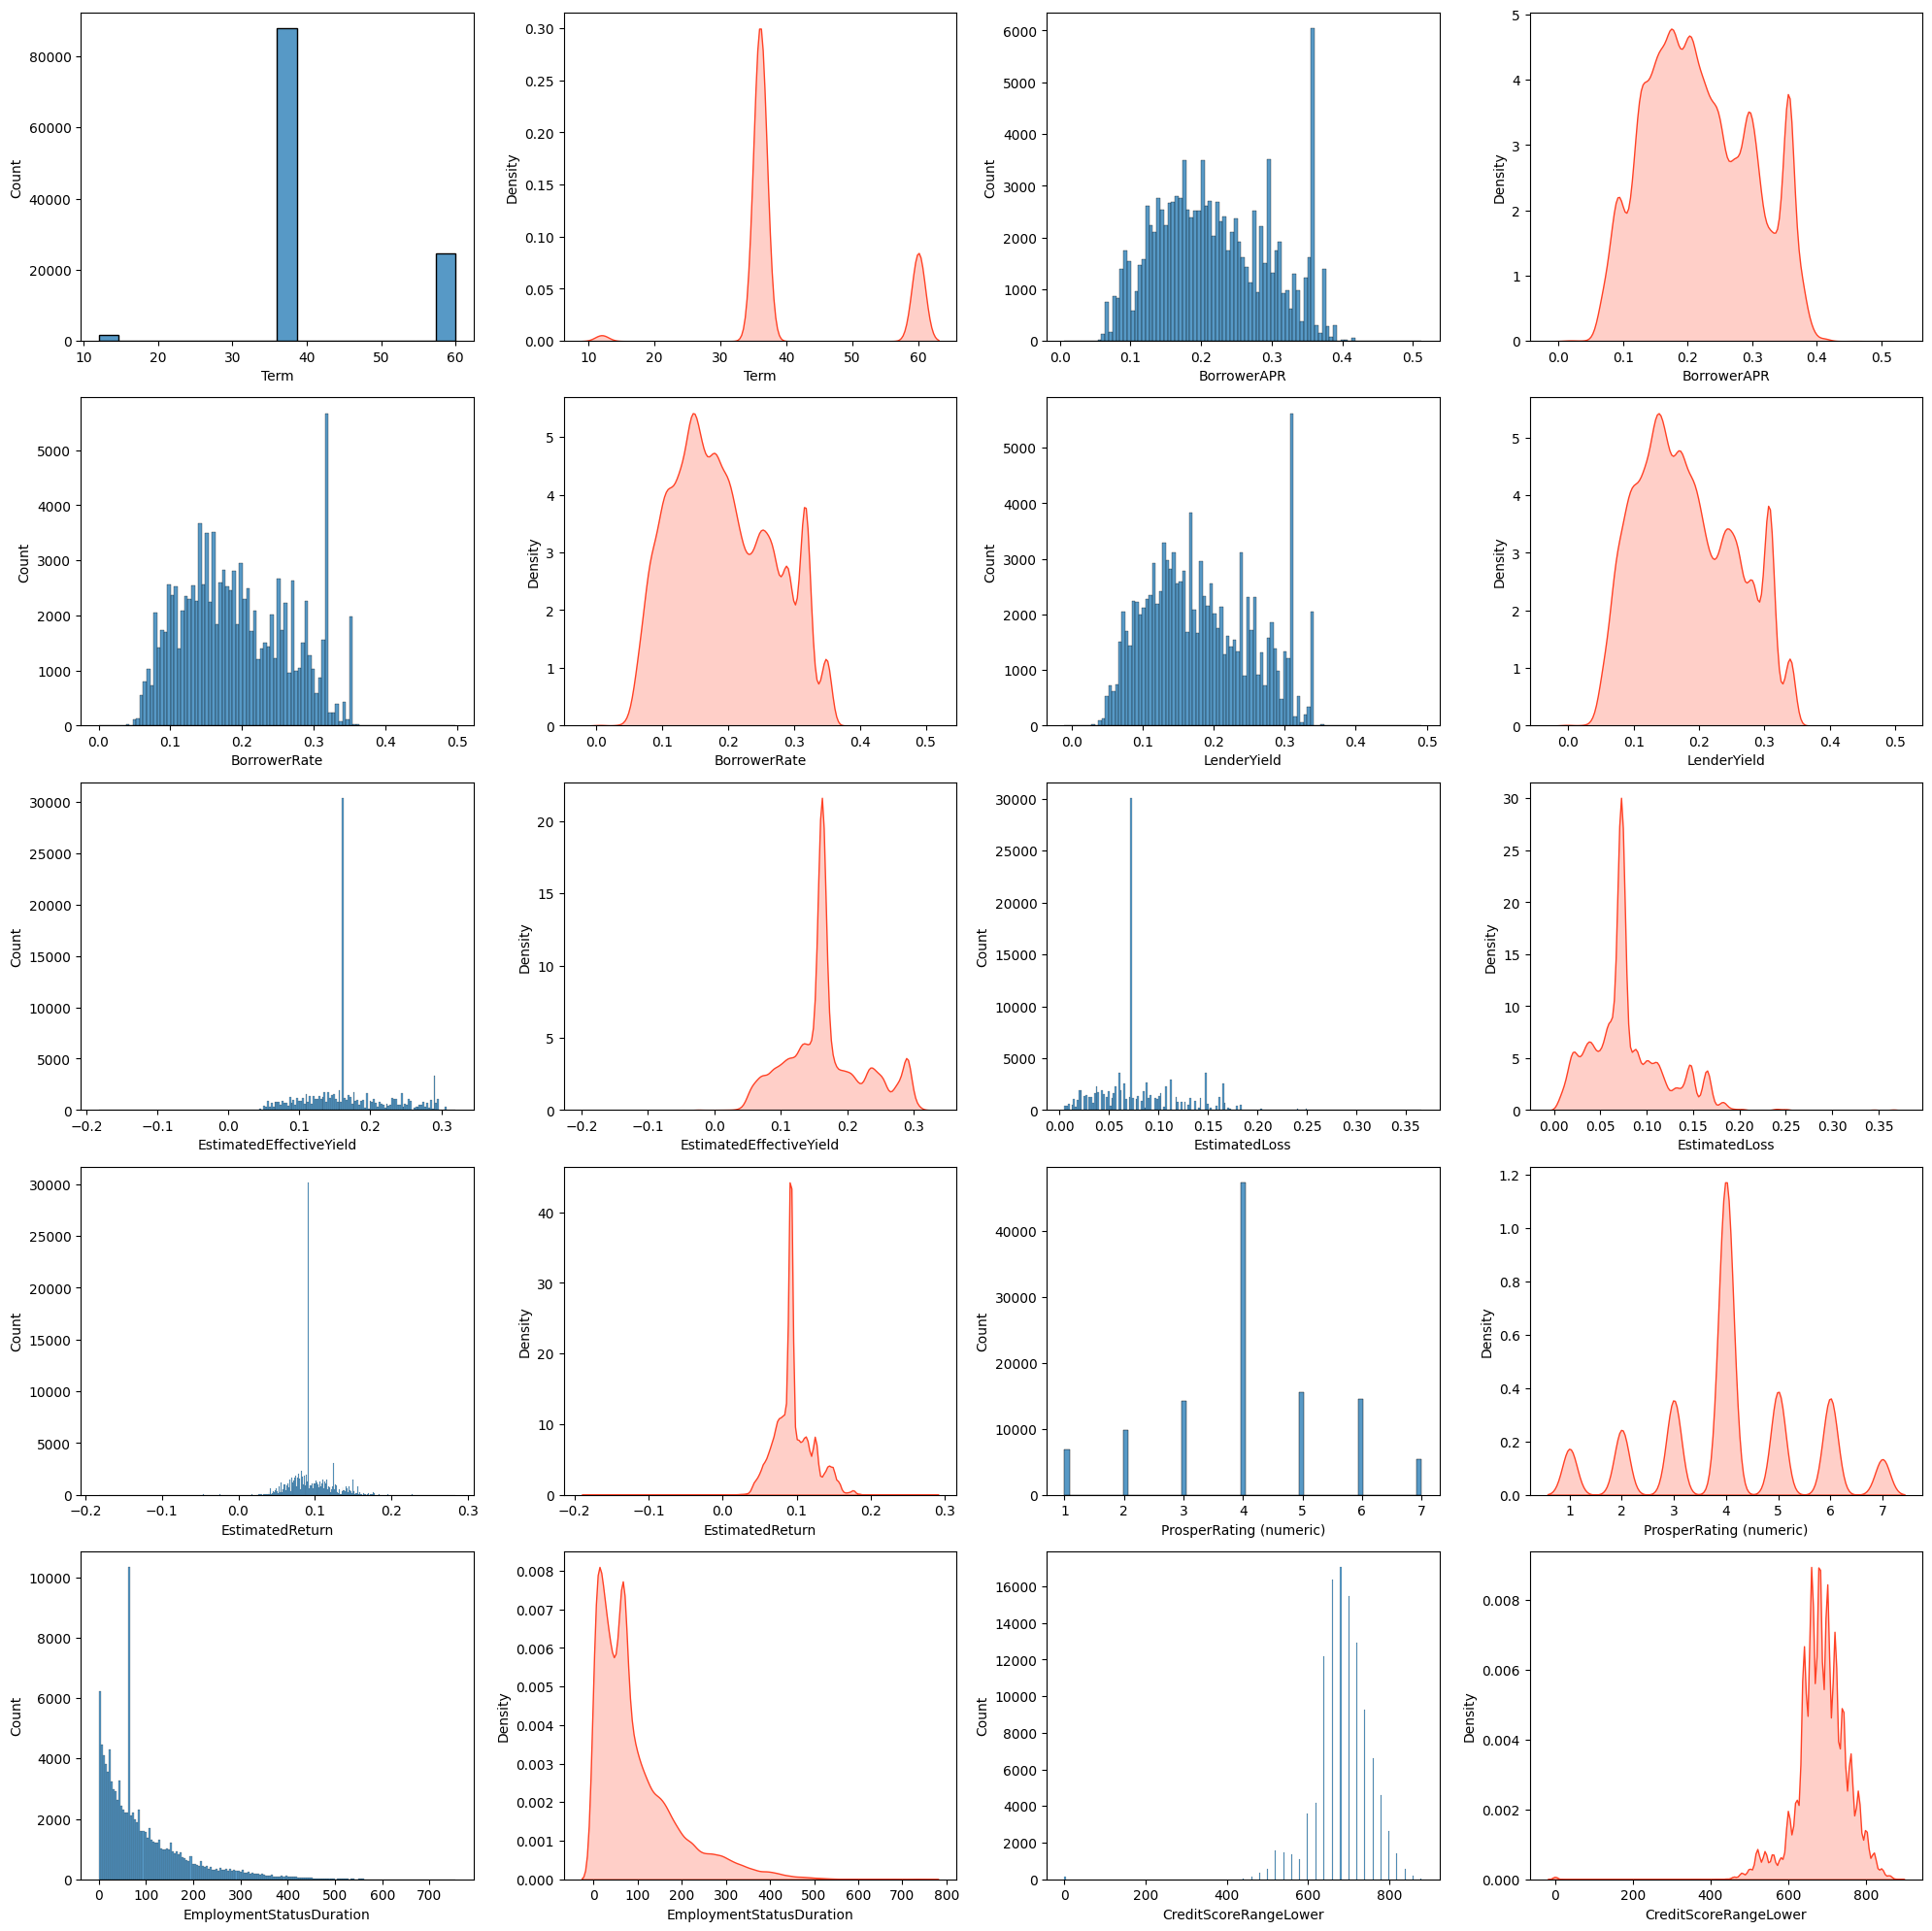

In [111]:
fig,ax = plt.subplots(5,4, figsize=(20,20))
sns.histplot(data['Term'], ax = ax[0,0])
sns.kdeplot(data['Term'],shade=True,color='#ff4125',ax=ax[0,1])
sns.histplot(data['BorrowerAPR'], ax = ax[0,2])
sns.kdeplot(data['BorrowerAPR'],shade=True,color='#ff4125',ax=ax[0,3])
sns.histplot(data['BorrowerRate'], ax = ax[1,0])
sns.kdeplot(data['BorrowerRate'],shade=True,color='#ff4125',ax=ax[1,1])
sns.histplot(data['LenderYield'], ax = ax[1,2])
sns.kdeplot(data['LenderYield'],shade=True,color='#ff4125',ax=ax[1,3])
sns.histplot(data['EstimatedEffectiveYield'], ax = ax[2,0])
sns.kdeplot(data['EstimatedEffectiveYield'],shade=True,color='#ff4125',ax=ax[2,1])
sns.histplot(data['EstimatedLoss'], ax = ax[2,2])
sns.kdeplot(data['EstimatedLoss'],shade=True,color='#ff4125',ax=ax[2,3])
sns.histplot(data['EstimatedReturn'], ax = ax[3,0])
sns.kdeplot(data['EstimatedReturn'],shade=True,color='#ff4125',ax=ax[3,1])
sns.histplot(data['ProsperRating (numeric)'], ax = ax[3,2])
sns.kdeplot(data['ProsperRating (numeric)'],shade=True,color='#ff4125',ax=ax[3,3])
sns.histplot(data['EmploymentStatusDuration'], ax = ax[4,0])
sns.kdeplot(data['EmploymentStatusDuration'],shade=True,color='#ff4125',ax=ax[4,1])
sns.histplot(data['CreditScoreRangeLower'], ax = ax[4,2])
sns.kdeplot(data['CreditScoreRangeLower'],shade=True,color='#ff4125',ax=ax[4,3])
plt.tight_layout()
plt.show()


<ipython-input-112-ecab55a690b5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['CreditScoreRangeUpper'],shade=True,color='#ff4125',ax=ax[0,1])
<ipython-input-112-ecab55a690b5>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['CurrentCreditLines'],shade=True,color='#ff4125',ax=ax[0,3])
<ipython-input-112-ecab55a690b5>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['OpenCreditLines'],shade=True,color='#ff4125',ax=ax[1,1])
<ipython-input-112-ecab55a690b5>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your

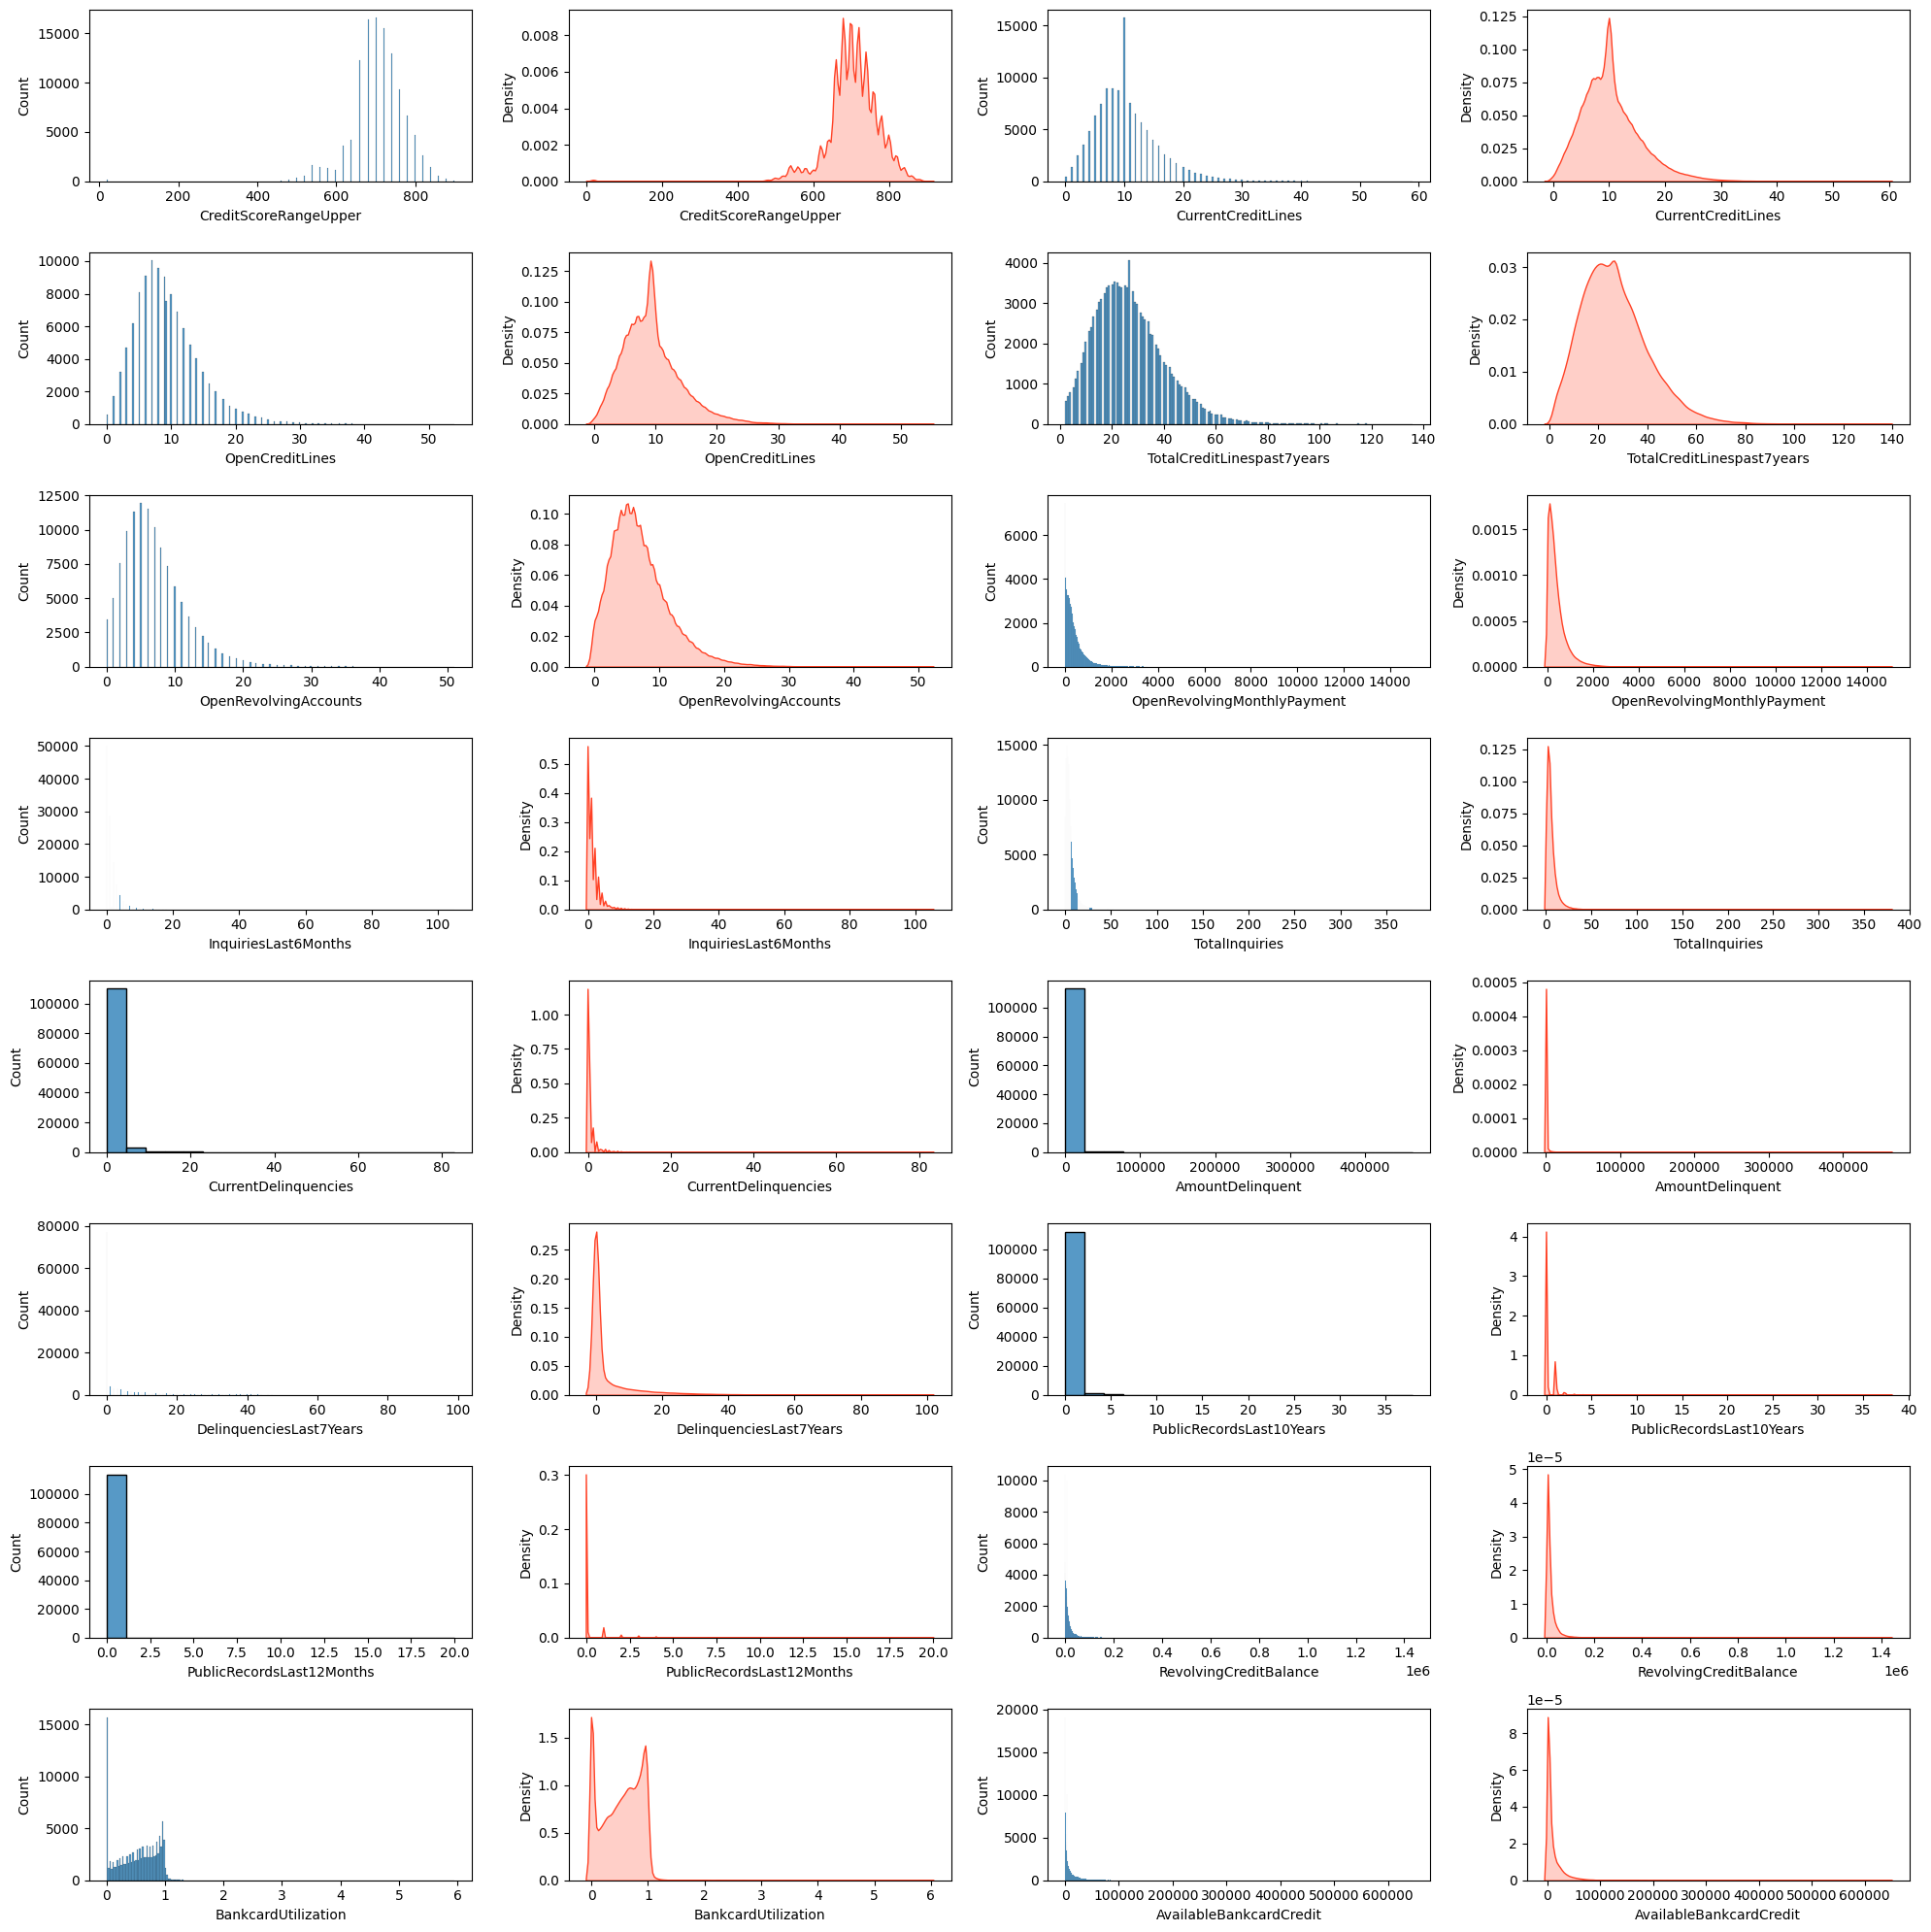

In [112]:
fig,ax = plt.subplots(8,4, figsize=(20,20))
sns.histplot(data['CreditScoreRangeUpper'], ax = ax[0,0])
sns.kdeplot(data['CreditScoreRangeUpper'],shade=True,color='#ff4125',ax=ax[0,1])
sns.histplot(data['CurrentCreditLines'], ax = ax[0,2])
sns.kdeplot(data['CurrentCreditLines'],shade=True,color='#ff4125',ax=ax[0,3])
sns.histplot(data['OpenCreditLines'], ax = ax[1,0])
sns.kdeplot(data['OpenCreditLines'],shade=True,color='#ff4125',ax=ax[1,1])
sns.histplot(data['TotalCreditLinespast7years'], ax = ax[1,2])
sns.kdeplot(data['TotalCreditLinespast7years'],shade=True,color='#ff4125',ax=ax[1,3])
sns.histplot(data['OpenRevolvingAccounts'], ax = ax[2,0])
sns.kdeplot(data['OpenRevolvingAccounts'],shade=True,color='#ff4125',ax=ax[2,1])
sns.histplot(data['OpenRevolvingMonthlyPayment'], ax = ax[2,2])
sns.kdeplot(data['OpenRevolvingMonthlyPayment'],shade=True,color='#ff4125',ax=ax[2,3])
sns.histplot(data['InquiriesLast6Months'], ax = ax[3,0])
sns.kdeplot(data['InquiriesLast6Months'],shade=True,color='#ff4125',ax=ax[3,1])
sns.histplot(data['TotalInquiries'], ax = ax[3,2])
sns.kdeplot(data['TotalInquiries'],shade=True,color='#ff4125',ax=ax[3,3])
sns.histplot(data['CurrentDelinquencies'], ax = ax[4,0])
sns.kdeplot(data['CurrentDelinquencies'],shade=True,color='#ff4125',ax=ax[4,1])
sns.histplot(data['AmountDelinquent'], ax = ax[4,2])
sns.kdeplot(data['AmountDelinquent'],shade=True,color='#ff4125',ax=ax[4,3])
sns.histplot(data['DelinquenciesLast7Years'], ax = ax[5,0])
sns.kdeplot(data['DelinquenciesLast7Years'],shade=True,color='#ff4125',ax=ax[5,1])
sns.histplot(data['PublicRecordsLast10Years'], ax = ax[5,2])
sns.kdeplot(data['PublicRecordsLast10Years'],shade=True,color='#ff4125',ax=ax[5,3])
sns.histplot(data['PublicRecordsLast12Months'], ax = ax[6,0])
sns.kdeplot(data['PublicRecordsLast12Months'],shade=True,color='#ff4125',ax=ax[6,1])
sns.histplot(data['RevolvingCreditBalance'], ax = ax[6,2])
sns.kdeplot(data['RevolvingCreditBalance'],shade=True,color='#ff4125',ax=ax[6,3])
sns.histplot(data['BankcardUtilization'], ax = ax[7,0])
sns.kdeplot(data['BankcardUtilization'],shade=True,color='#ff4125',ax=ax[7,1])
sns.histplot(data['AvailableBankcardCredit'], ax = ax[7,2])
sns.kdeplot(data['AvailableBankcardCredit'],shade=True,color='#ff4125',ax=ax[7,3])
plt.tight_layout()
plt.show()




<ipython-input-113-b3187e74240a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['TotalTrades'],shade=True,color='#ff4125',ax=ax[0,1])
<ipython-input-113-b3187e74240a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['TradesNeverDelinquent (percentage)'],shade=True,color='#ff4125',ax=ax[0,3])
<ipython-input-113-b3187e74240a>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['TradesOpenedLast6Months'],shade=True,color='#ff4125',ax=ax[1,1])
<ipython-input-113-b3187e74240a>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; plea

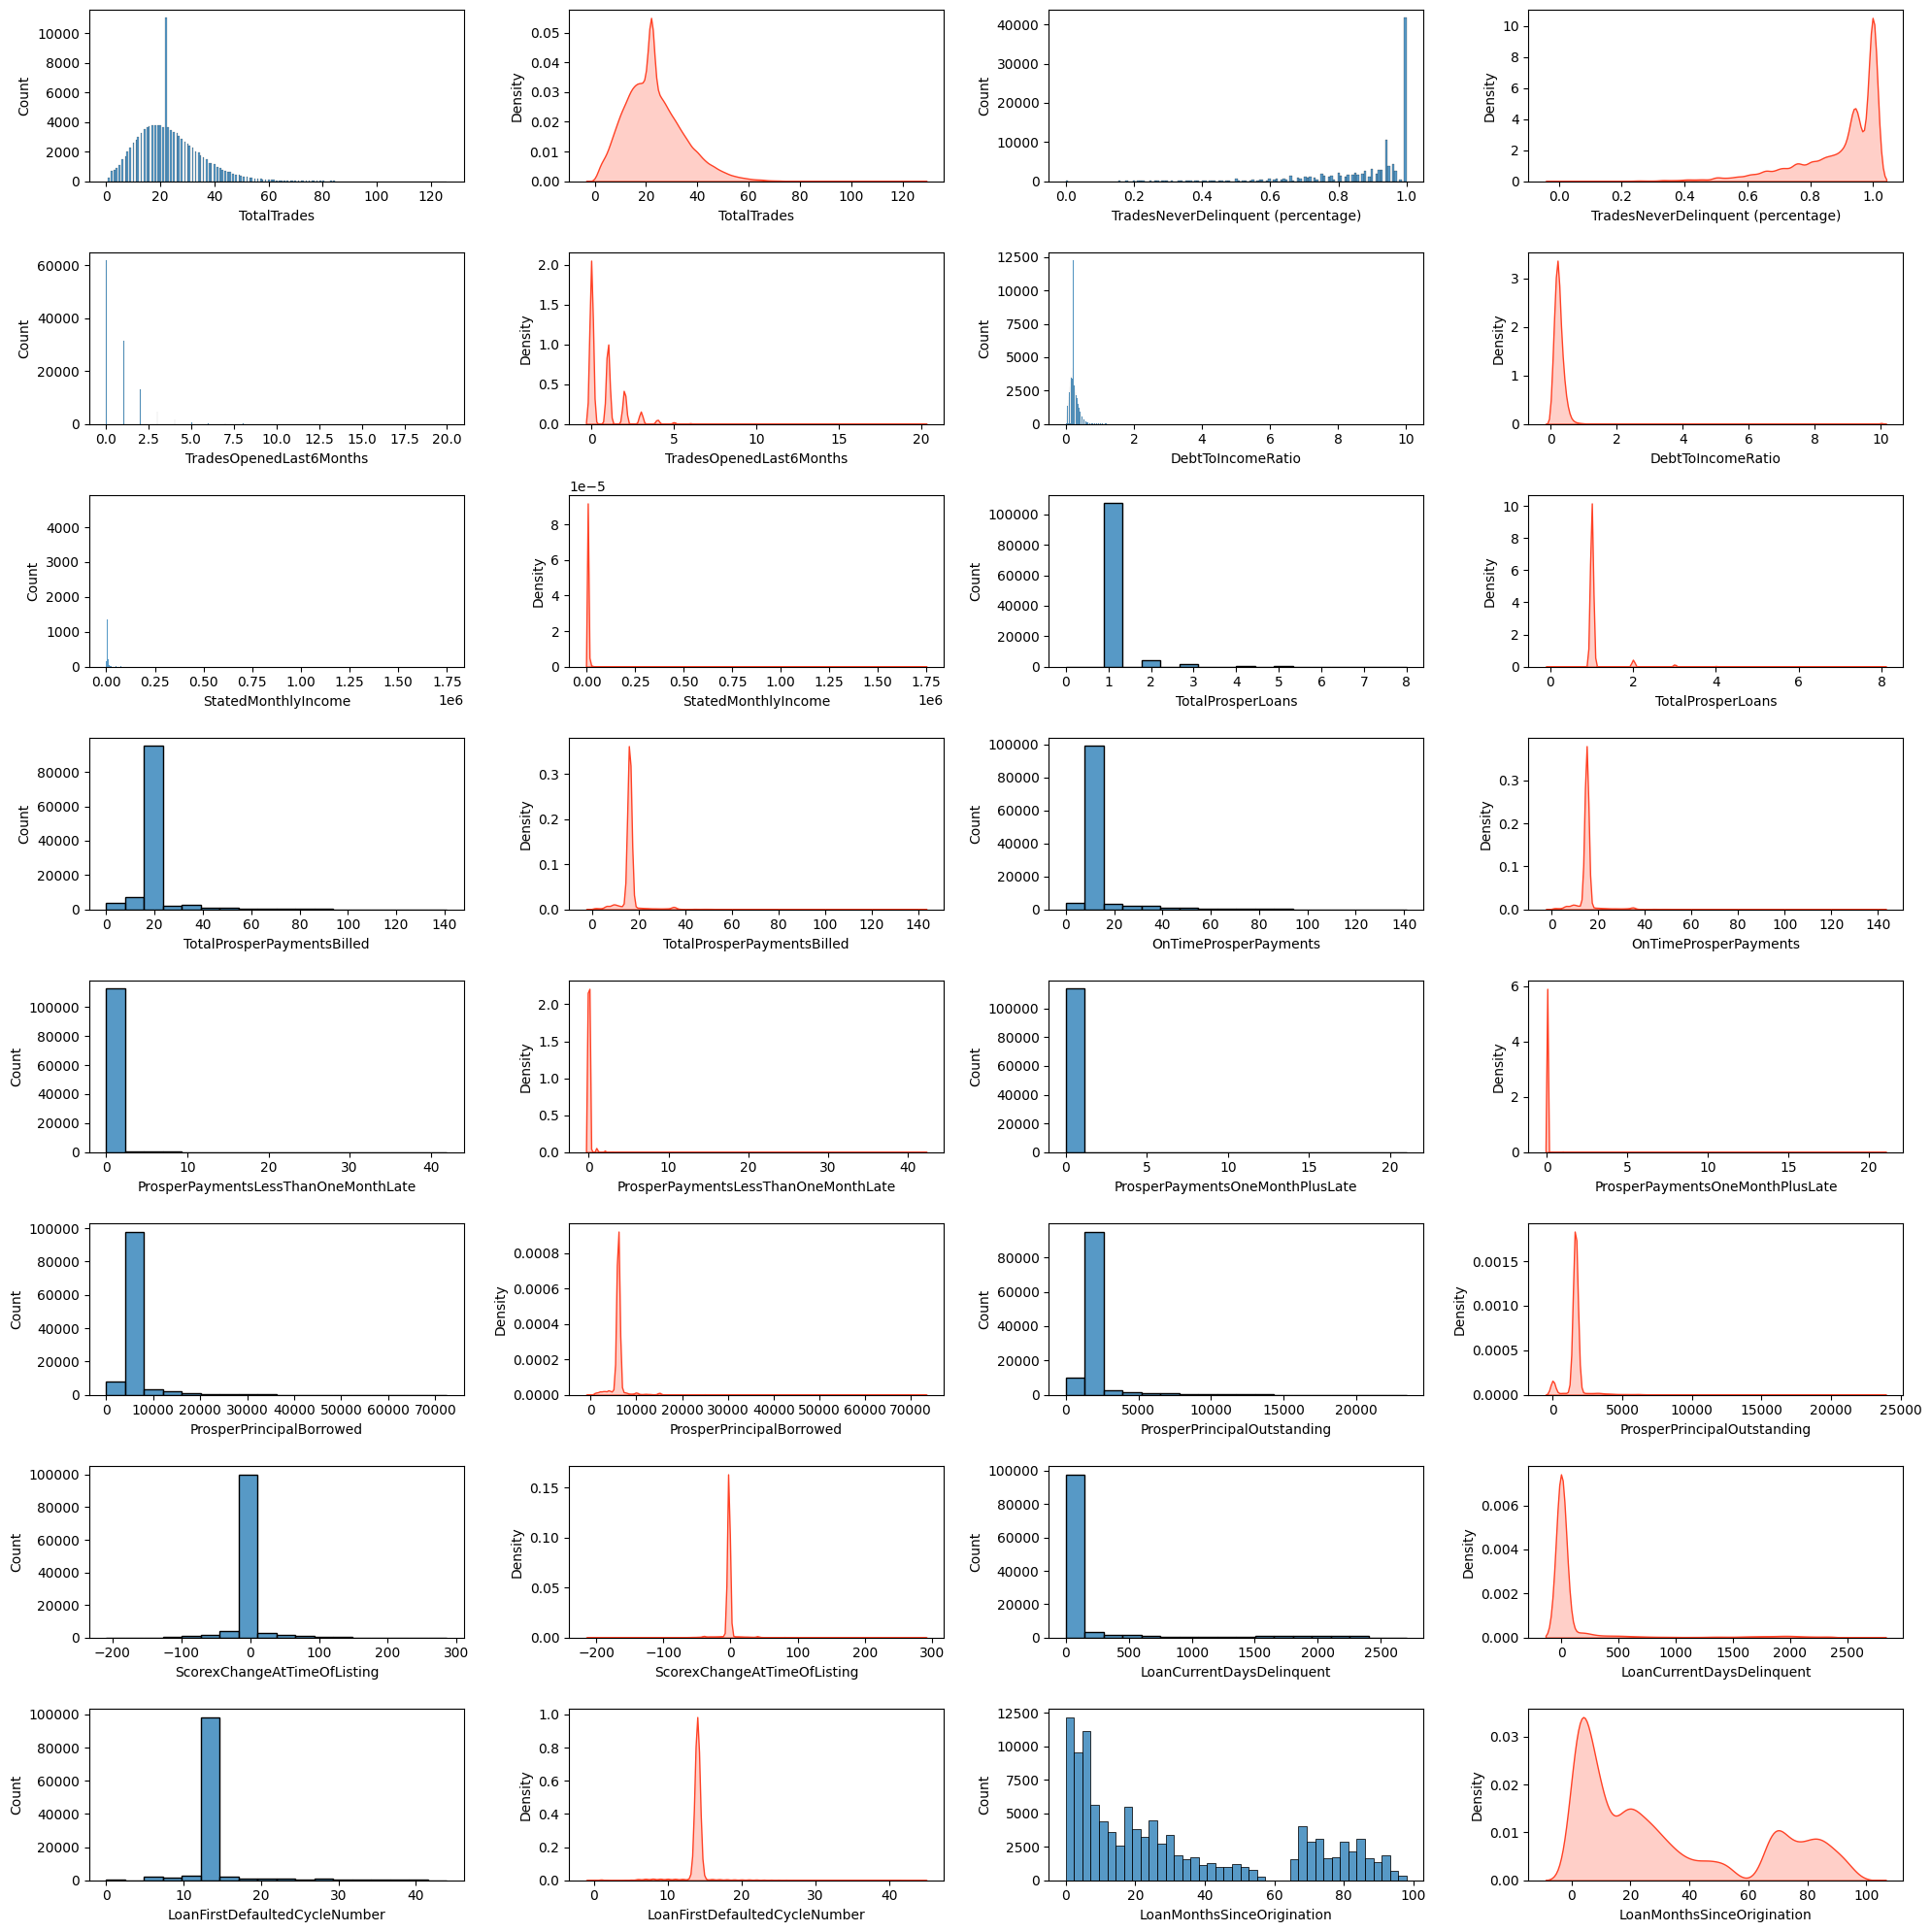

In [113]:
fig,ax = plt.subplots(8,4, figsize=(20,20))
sns.histplot(data['TotalTrades'], ax = ax[0,0])
sns.kdeplot(data['TotalTrades'],shade=True,color='#ff4125',ax=ax[0,1])
sns.histplot(data['TradesNeverDelinquent (percentage)'], ax = ax[0,2])
sns.kdeplot(data['TradesNeverDelinquent (percentage)'],shade=True,color='#ff4125',ax=ax[0,3])
sns.histplot(data['TradesOpenedLast6Months'], ax = ax[1,0])
sns.kdeplot(data['TradesOpenedLast6Months'],shade=True,color='#ff4125',ax=ax[1,1])
sns.histplot(data['DebtToIncomeRatio'], ax = ax[1,2])
sns.kdeplot(data['DebtToIncomeRatio'],shade=True,color='#ff4125',ax=ax[1,3])
sns.histplot(data['StatedMonthlyIncome'], ax = ax[2,0])
sns.kdeplot(data['StatedMonthlyIncome'],shade=True,color='#ff4125',ax=ax[2,1])
sns.histplot(data['TotalProsperLoans'], ax = ax[2,2])
sns.kdeplot(data['TotalProsperLoans'],shade=True,color='#ff4125',ax=ax[2,3])
sns.histplot(data['TotalProsperPaymentsBilled'], ax = ax[3,0])
sns.kdeplot(data['TotalProsperPaymentsBilled'],shade=True,color='#ff4125',ax=ax[3,1])
sns.histplot(data['OnTimeProsperPayments'], ax = ax[3,2])
sns.kdeplot(data['OnTimeProsperPayments'],shade=True,color='#ff4125',ax=ax[3,3])
sns.histplot(data['ProsperPaymentsLessThanOneMonthLate'], ax = ax[4,0])
sns.kdeplot(data['ProsperPaymentsLessThanOneMonthLate'],shade=True,color='#ff4125',ax=ax[4,1])
sns.histplot(data['ProsperPaymentsOneMonthPlusLate'], ax = ax[4,2])
sns.kdeplot(data['ProsperPaymentsOneMonthPlusLate'],shade=True,color='#ff4125',ax=ax[4,3])
sns.histplot(data['ProsperPrincipalBorrowed'], ax = ax[5,0])
sns.kdeplot(data['ProsperPrincipalBorrowed'],shade=True,color='#ff4125',ax=ax[5,1])
sns.histplot(data['ProsperPrincipalOutstanding'], ax = ax[5,2])
sns.kdeplot(data['ProsperPrincipalOutstanding'],shade=True,color='#ff4125',ax=ax[5,3])
sns.histplot(data['ScorexChangeAtTimeOfListing'], ax = ax[6,0])
sns.kdeplot(data['ScorexChangeAtTimeOfListing'],shade=True,color='#ff4125',ax=ax[6,1])
sns.histplot(data['LoanCurrentDaysDelinquent'], ax = ax[6,2])
sns.kdeplot(data['LoanCurrentDaysDelinquent'],shade=True,color='#ff4125',ax=ax[6,3])
sns.histplot(data['LoanFirstDefaultedCycleNumber'], ax = ax[7,0])
sns.kdeplot(data['LoanFirstDefaultedCycleNumber'],shade=True,color='#ff4125',ax=ax[7,1])
sns.histplot(data['LoanMonthsSinceOrigination'], ax = ax[7,2])
sns.kdeplot(data['LoanMonthsSinceOrigination'],shade=True,color='#ff4125',ax=ax[7,3])
plt.tight_layout()
plt.show()



In [114]:
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalT

<ipython-input-115-4b82e958f876>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['LoanNumber'],shade=True,color='#ff4125',ax=ax[0,1])
<ipython-input-115-4b82e958f876>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['LoanOriginalAmount'],shade=True,color='#ff4125',ax=ax[0,3])
<ipython-input-115-4b82e958f876>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['MonthlyLoanPayment'],shade=True,color='#ff4125',ax=ax[1,1])
<ipython-input-115-4b82e958f876>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



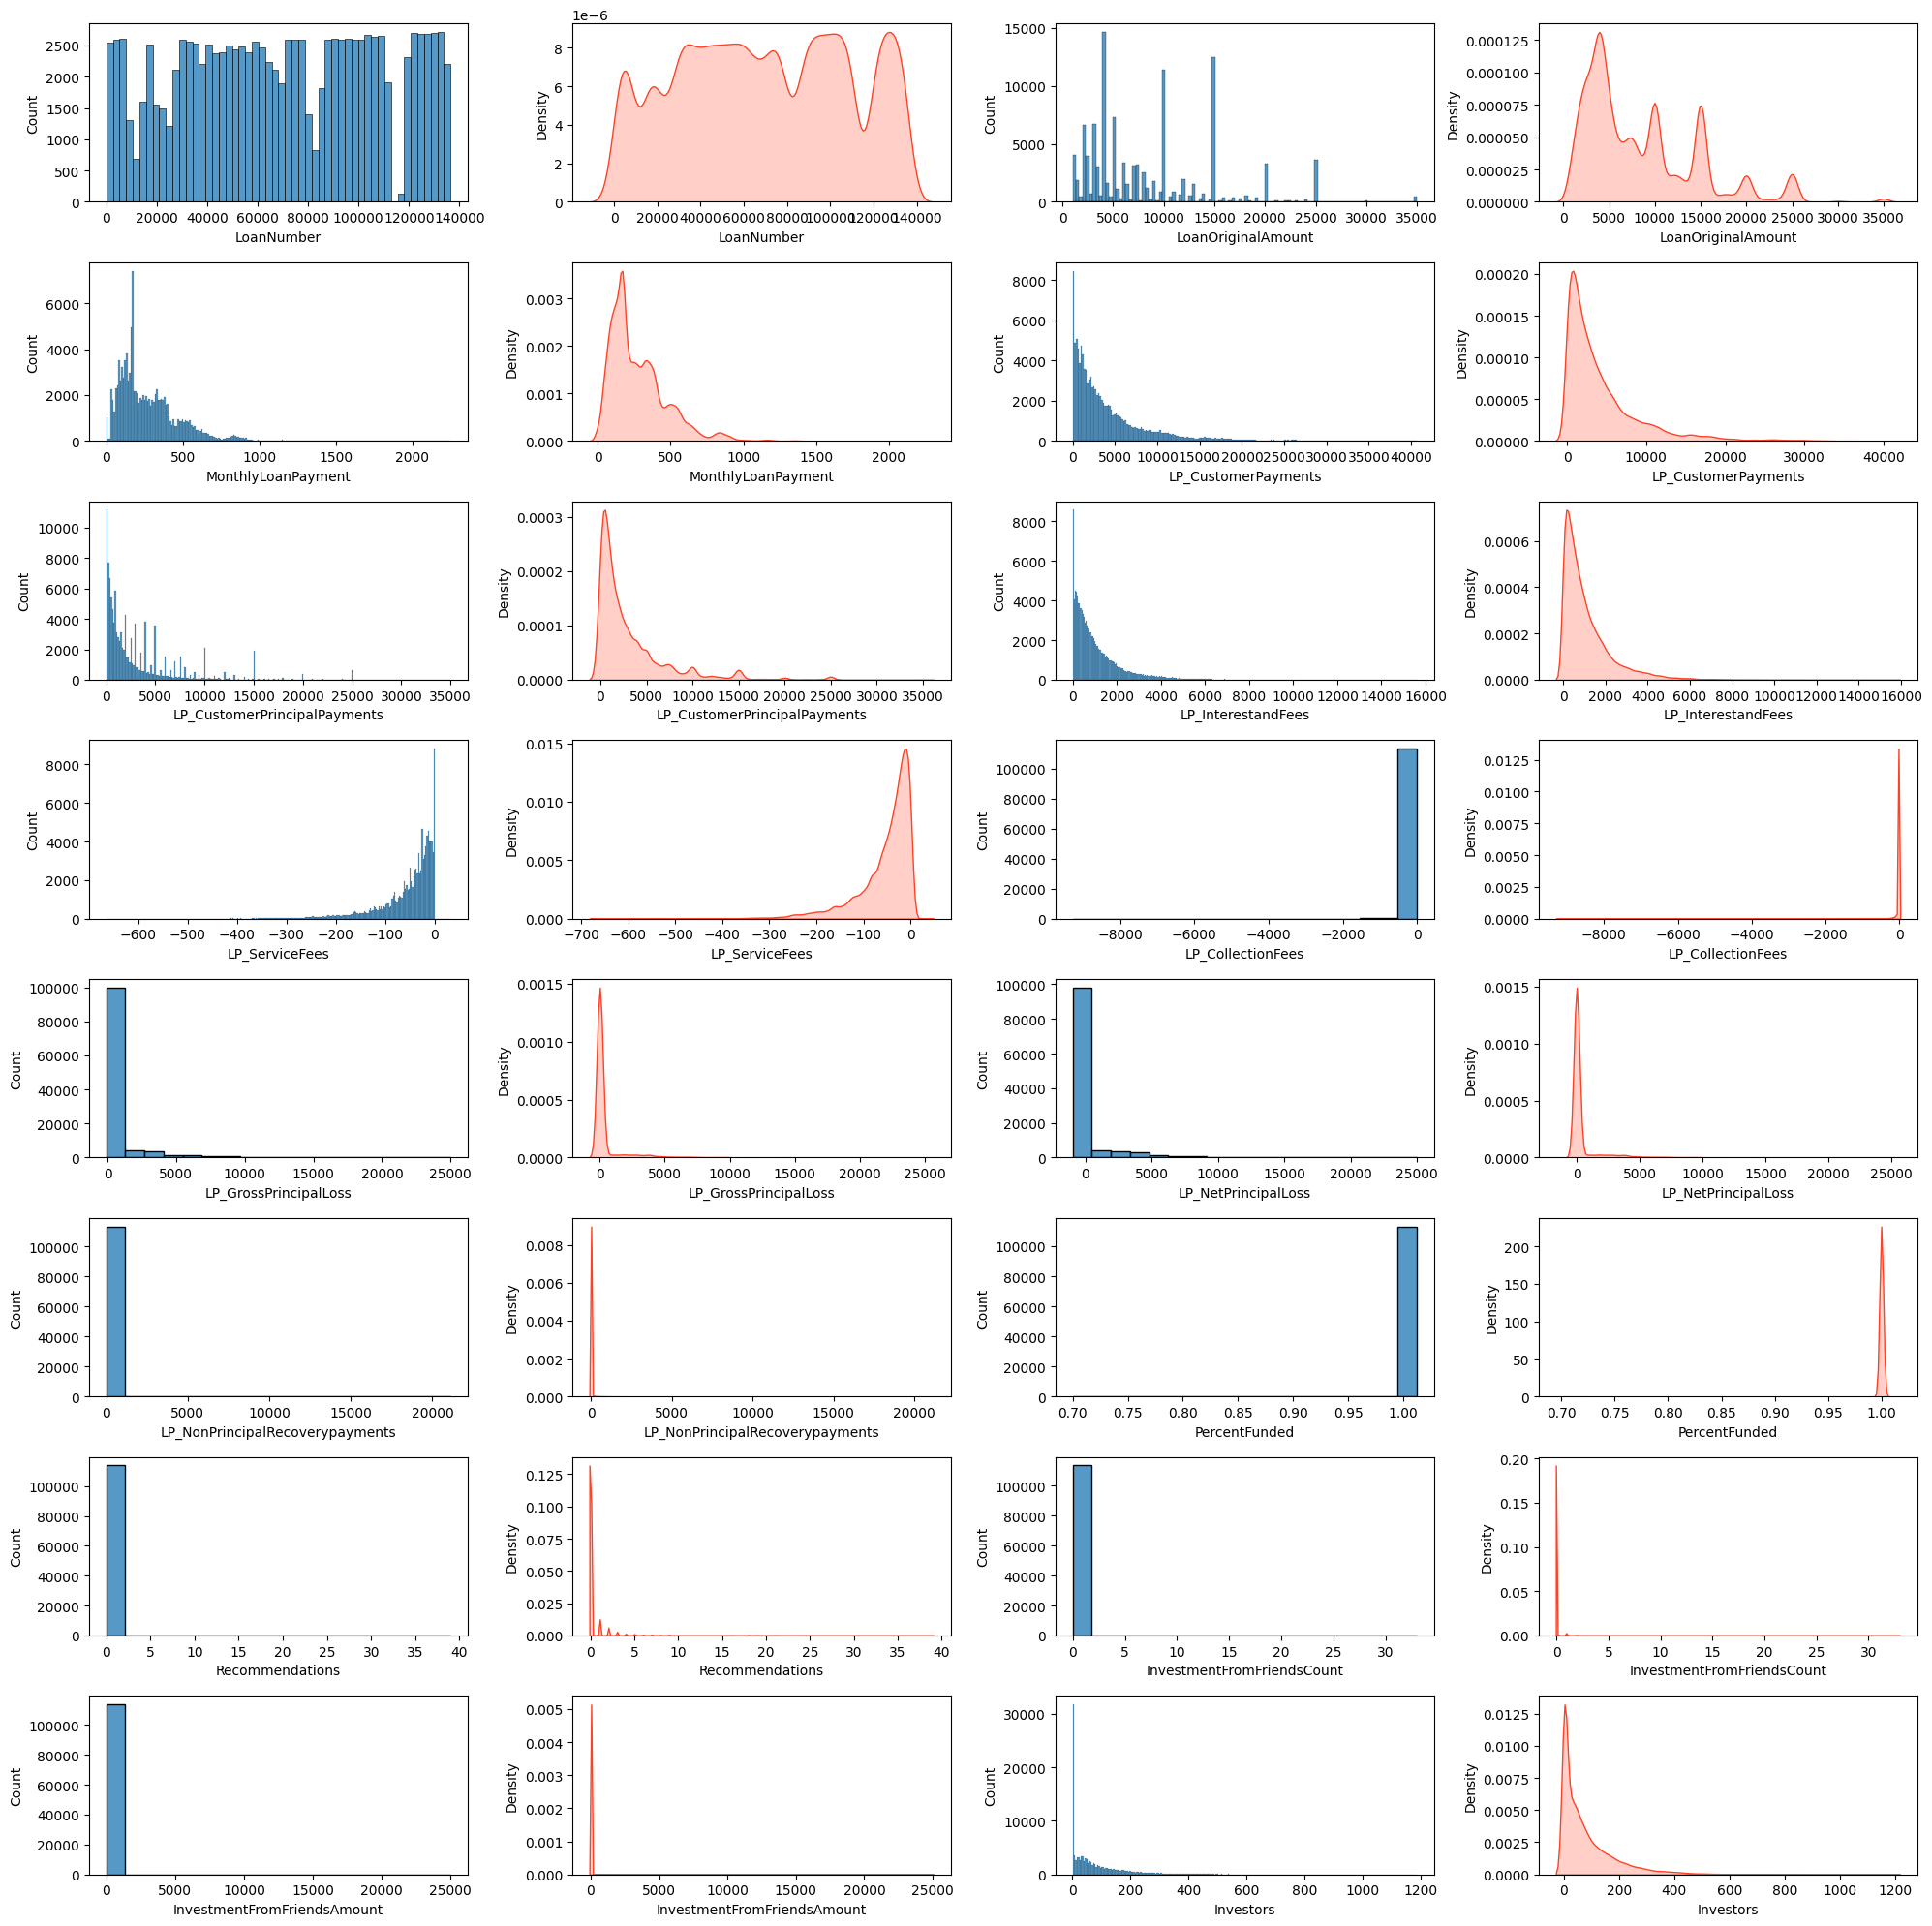

In [115]:
fig,ax = plt.subplots(8,4, figsize=(20,20))
sns.histplot(data['LoanNumber'], ax = ax[0,0])
sns.kdeplot(data['LoanNumber'],shade=True,color='#ff4125',ax=ax[0,1])
sns.histplot(data['LoanOriginalAmount'], ax = ax[0,2])
sns.kdeplot(data['LoanOriginalAmount'],shade=True,color='#ff4125',ax=ax[0,3])
sns.histplot(data['MonthlyLoanPayment'], ax = ax[1,0])
sns.kdeplot(data['MonthlyLoanPayment'],shade=True,color='#ff4125',ax=ax[1,1])
sns.histplot(data['LP_CustomerPayments'], ax = ax[1,2])
sns.kdeplot(data['LP_CustomerPayments'],shade=True,color='#ff4125',ax=ax[1,3])
sns.histplot(data['LP_CustomerPrincipalPayments'], ax = ax[2,0])
sns.kdeplot(data['LP_CustomerPrincipalPayments'],shade=True,color='#ff4125',ax=ax[2,1])
sns.histplot(data['LP_InterestandFees'], ax = ax[2,2])
sns.kdeplot(data['LP_InterestandFees'],shade=True,color='#ff4125',ax=ax[2,3])
sns.histplot(data['LP_ServiceFees'], ax = ax[3,0])
sns.kdeplot(data['LP_ServiceFees'],shade=True,color='#ff4125',ax=ax[3,1])
sns.histplot(data['LP_CollectionFees'], ax = ax[3,2])
sns.kdeplot(data['LP_CollectionFees'],shade=True,color='#ff4125',ax=ax[3,3])
sns.histplot(data['LP_GrossPrincipalLoss'], ax = ax[4,0])
sns.kdeplot(data['LP_GrossPrincipalLoss'],shade=True,color='#ff4125',ax=ax[4,1])
sns.histplot(data['LP_NetPrincipalLoss'], ax = ax[4,2])
sns.kdeplot(data['LP_NetPrincipalLoss'],shade=True,color='#ff4125',ax=ax[4,3])
sns.histplot(data['LP_NonPrincipalRecoverypayments'], ax = ax[5,0])
sns.kdeplot(data['LP_NonPrincipalRecoverypayments'],shade=True,color='#ff4125',ax=ax[5,1])
sns.histplot(data['PercentFunded'], ax = ax[5,2])
sns.kdeplot(data['PercentFunded'],shade=True,color='#ff4125',ax=ax[5,3])
sns.histplot(data['Recommendations'], ax = ax[6,0])
sns.kdeplot(data['Recommendations'],shade=True,color='#ff4125',ax=ax[6,1])
sns.histplot(data['InvestmentFromFriendsCount'], ax = ax[6,2])
sns.kdeplot(data['InvestmentFromFriendsCount'],shade=True,color='#ff4125',ax=ax[6,3])
sns.histplot(data['InvestmentFromFriendsAmount'], ax = ax[7,0])
sns.kdeplot(data['InvestmentFromFriendsAmount'],shade=True,color='#ff4125',ax=ax[7,1])
sns.histplot(data['Investors'], ax = ax[7,2])
sns.kdeplot(data['Investors'],shade=True,color='#ff4125',ax=ax[7,3])
plt.tight_layout()
plt.show()

For each categorical columns,bar and pie plots are used to analyze the frequency distribution.

**CREDIT GRADE:**
Credit scores are assigned to individuals based on their personal history of acquiring and repaying debt. They are checked by lenders considering loaning money to a consumer.While each rating agency uses a slightly different scale, they assign ratings as letter grades. In general, a rating of AAA is the highest possible credit rating, while a C or D rating is the lowest.

<ipython-input-116-0689e7dff283>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='CreditGrade', data = data,order = data["CreditGrade"].value_counts().index,palette="Spectral");


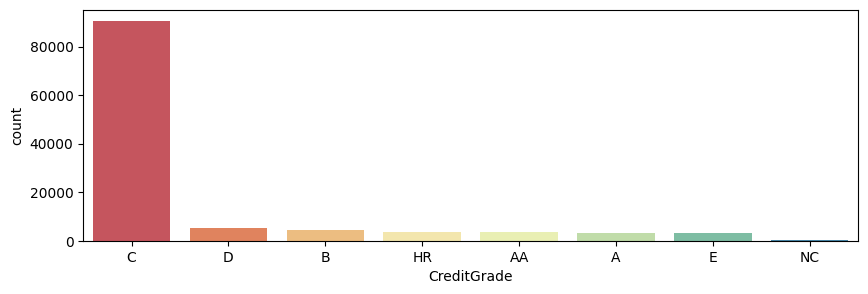

In [116]:
plt.figure(figsize=(10,3))
sns.countplot(x ='CreditGrade', data = data,order = data["CreditGrade"].value_counts().index,palette="Spectral");
plt.show()

**PROSPER RATING:**Every loan application is assigned a Prosper Rating—a proprietary rating system that allows for consistency in the evaluation of applicants. Potential investors use Prosper Ratings to help decide whether to commit to invest in your loan listing.

<ipython-input-117-824859e49d32>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='ProsperRating (Alpha)', data = data,order = data["ProsperRating (Alpha)"].value_counts().index,palette="pastel");


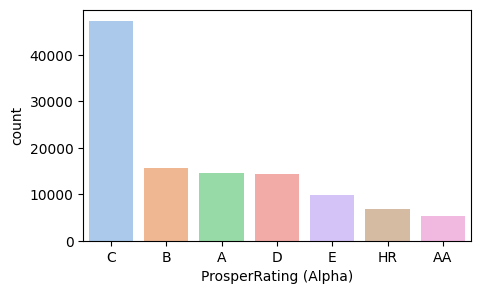

In [117]:
plt.figure(figsize=(5,3))
sns.countplot(x ='ProsperRating (Alpha)', data = data,order = data["ProsperRating (Alpha)"].value_counts().index,palette="pastel");
plt.show()

**EMPLOYMENT STATUS:** The employment status of the borrower at the time they posted the listing.Employed,Full-time,Self-employment,other,part-time,not employed and retired aer categories.

<ipython-input-118-822a9980aec0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='EmploymentStatus', data = data,order = data["EmploymentStatus"].value_counts().index,palette="pastel");


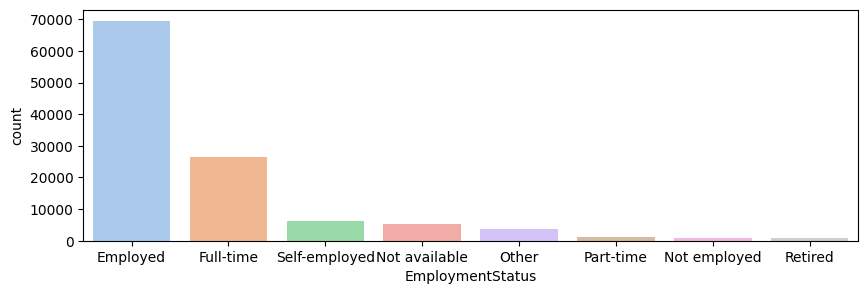

In [118]:
plt.figure(figsize=(10,3))
sns.countplot(x ='EmploymentStatus', data = data,order = data["EmploymentStatus"].value_counts().index,palette="pastel");
plt.show()

**INCOME RANGE** The income range of the borrower at the time the listing was created.

<ipython-input-119-ae6204dbefbb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='IncomeRange', data = data,order = data["IncomeRange"].value_counts().index,palette="pastel");


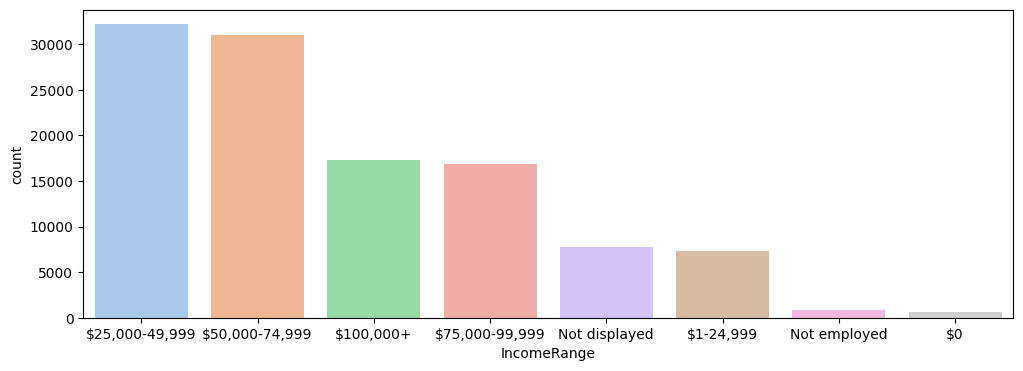

In [119]:
plt.figure(figsize=(12,4))
sns.countplot(x ='IncomeRange', data = data,order = data["IncomeRange"].value_counts().index,palette="pastel");
plt.show()

**LOAN STATUS:**The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

<ipython-input-120-65ce18c23f4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='LoanStatus', data = data,order = data["LoanStatus"].value_counts().index,palette="pastel");


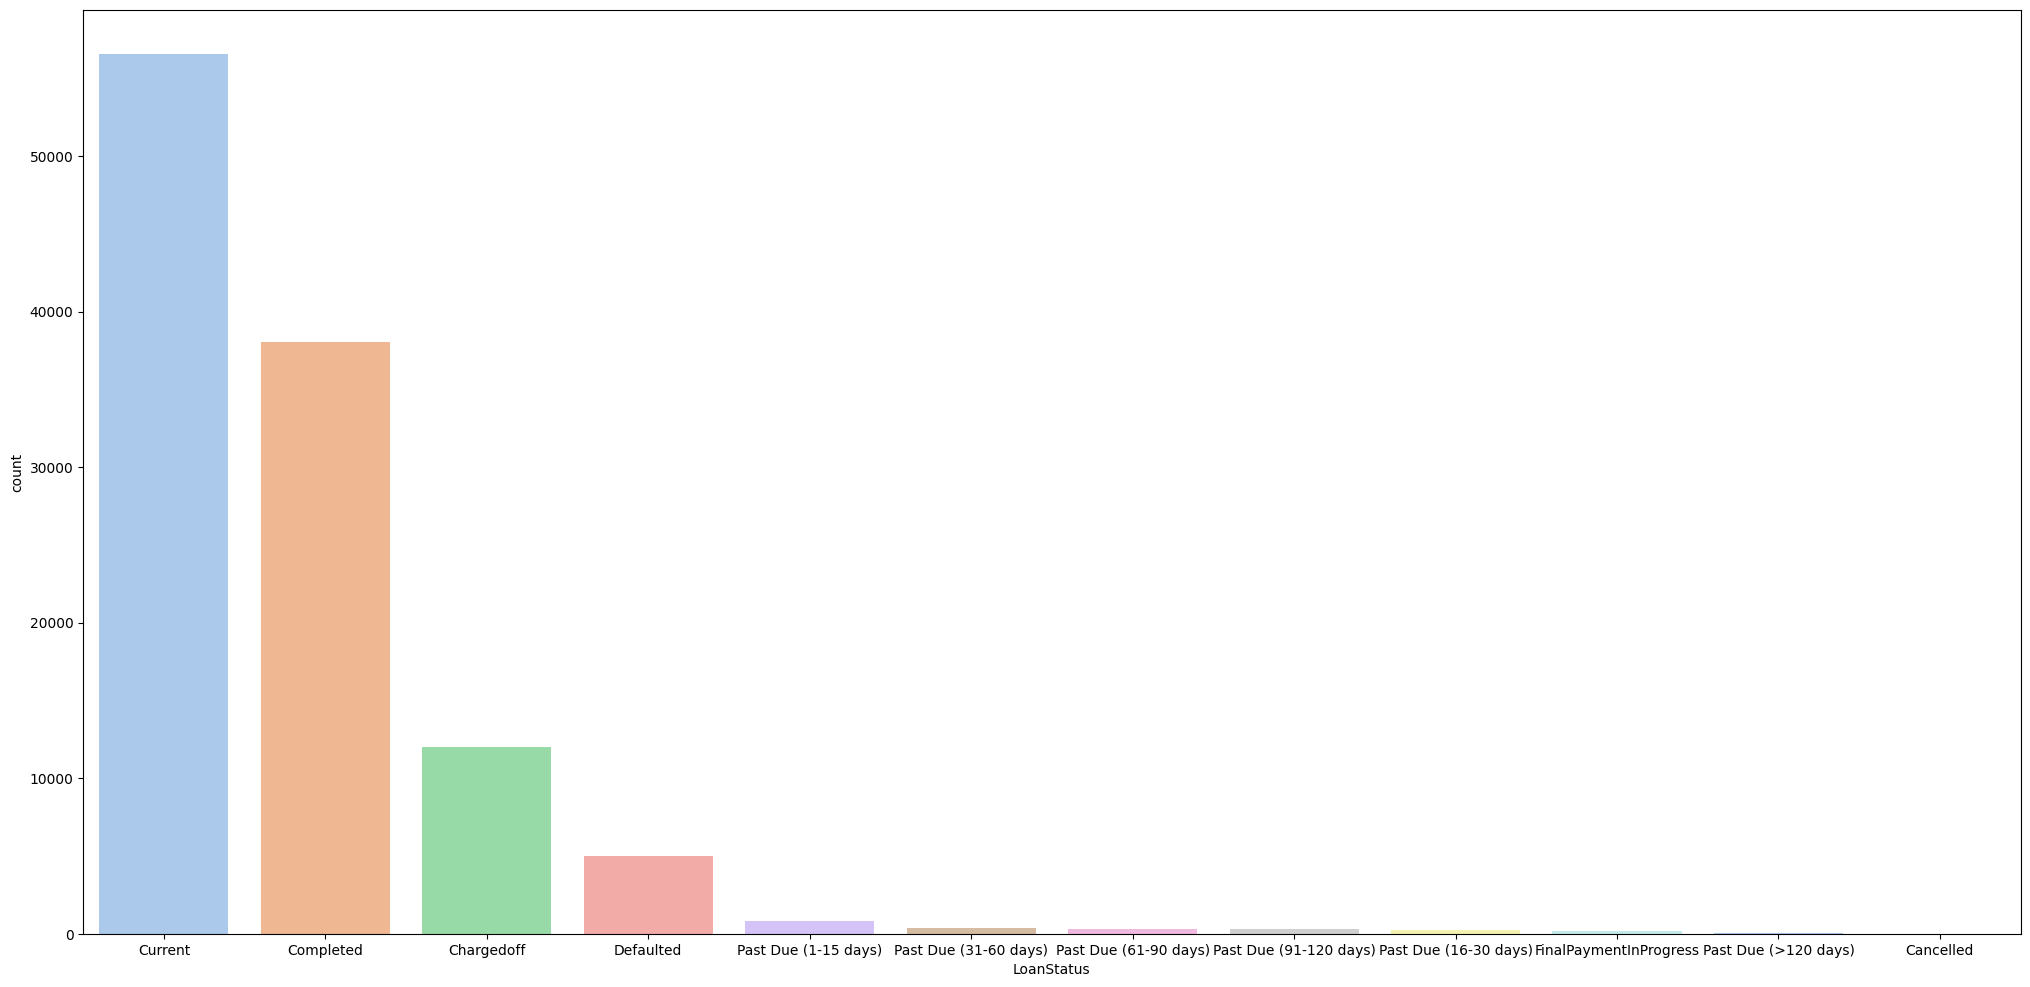

In [120]:
plt.figure(figsize=(25,12))
sns.countplot(x ='LoanStatus', data = data,order = data["LoanStatus"].value_counts().index,palette="pastel");
plt.show()

**TARGET COLUMN**

The target column is Loanstatus,that contains 12 different categorical values.This column shoud be converted into binary column to perform binary Classification.

In [121]:
data["LoanStatus"].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

Conversion from categorical into binary can be done with the help of other two coulmns called "ClosedDate" and "LoanCurrentDaysDelinquent


In [122]:
data["LoanStatus"]=data["ClosedDate"].apply(lambda x: 1 if pd.isnull(x) else 0)

In [123]:
data["LoanStatus"] = data["LoanCurrentDaysDelinquent"].apply(lambda x: 1 if x > 180 else 0)

In [124]:
data["LoanStatus"].value_counts()#converted into binary column

LoanStatus
0    98849
1    15063
Name: count, dtype: int64

<ipython-input-125-fdb9da0ccf61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='LoanStatus', data = data,palette="pastel");


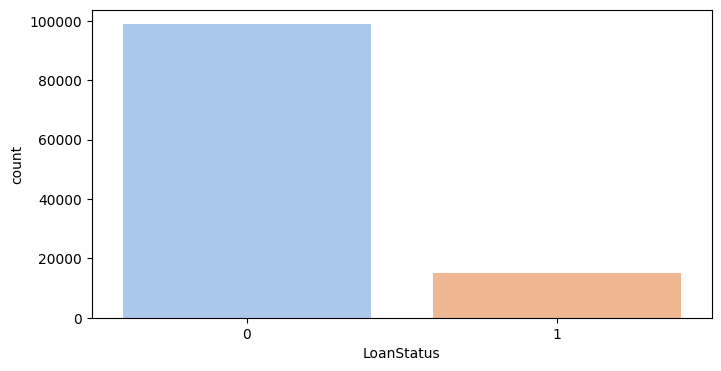

In [125]:
plt.figure(figsize=(8,4))
sns.countplot(x ='LoanStatus', data = data,palette="pastel");
plt.show()


The number of observations belonging to the '0' or 'incompleted' category is way greater than that belonging to '1'or 'Completed' category. Hence we have skewed classes and this is  the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques.

### **BIVARIATE ANALYSIS**

**BORROWER RATE:**The interest rate is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned. The interest rate on a loan is typically noted on an annual basis and expressed as an annual percentage rate (APR).

**PROSPER SCORE:**
Prosper Score means the proprietary credit score assigned by the Company to each Borrower Loan and used by the Company in the calculation of Prosper Ratings.

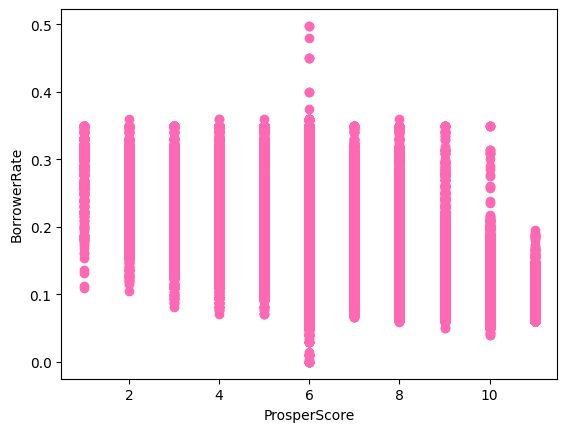

In [126]:
plt.scatter(data=data,x="ProsperScore",y ="BorrowerRate",color = 'hotpink')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.show()

**TERM**:The length of the loan expressed in months i.e 12,36 and 60.

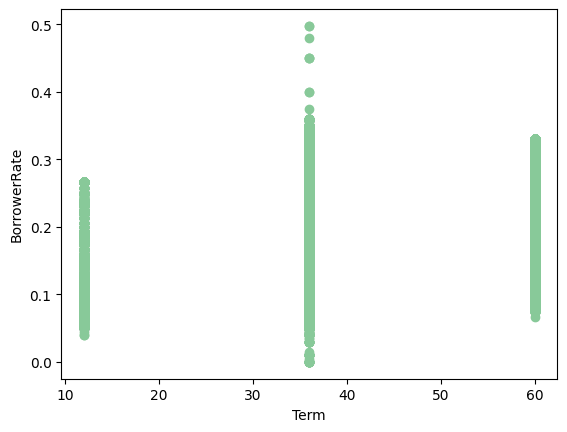

In [127]:
plt.scatter(data=data,x="Term",y ="BorrowerRate",color = '#88c999')
plt.xlabel('Term')
plt.ylabel('BorrowerRate')
plt.show()

**ESTIMATED EFFECTIVE YIELD:** Effective yield is equal to borrower interest rate(i)minus servicing fees rate.
(ii)minus estimated uncollected interest on charged-offs.
(iii)plus estimated collected fees.

**ESTIMATED RETURN:**It is the difference between estimated effective yield and estimated loss rate.

**ESTIMATED LOSS:**It is the estimated  principal loss on charge-offs.

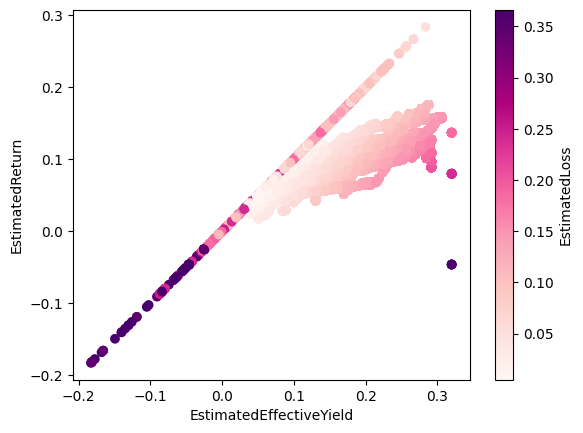

In [128]:
plt.scatter(data=data,x="EstimatedEffectiveYield",y ="EstimatedReturn",c="EstimatedLoss",cmap='RdPu')
plt.colorbar(label="EstimatedLoss")
plt.xlabel('EstimatedEffectiveYield')
plt.ylabel('EstimatedReturn')
plt.show()

**Total prosper Payments Billed:**The number of payments the borrower made on prosper loans.

**On Time Prosper Payments:**The number of on time payments the borrower made on prosper loans.

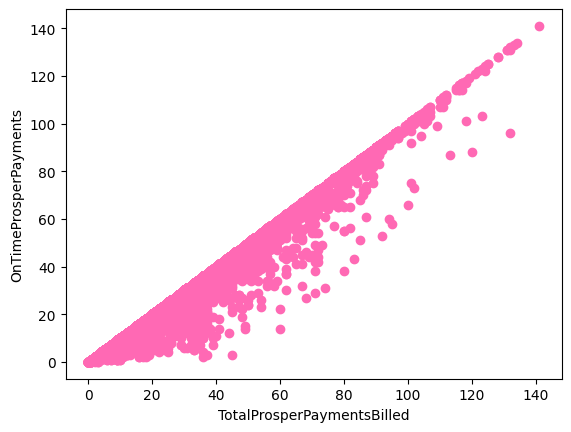

In [129]:
plt.scatter(data=data,x="TotalProsperPaymentsBilled",y ="OnTimeProsperPayments",
            color = 'hotpink')
plt.xlabel('TotalProsperPaymentsBilled')
plt.ylabel('OnTimeProsperPayments')

plt.show()

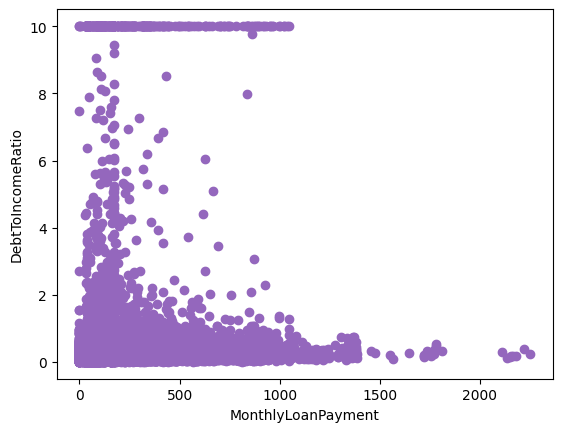

In [130]:
plt.scatter(data=data,x="MonthlyLoanPayment",y ="DebtToIncomeRatio",color = '#9467bd')
plt.xlabel("MonthlyLoanPayment")
plt.ylabel('DebtToIncomeRatio')

plt.show()

**Correlations:**A correlation is a statistical measure of the relationship between two variables. The measure is best used in variables that demonstrate a linear relationship between each other.

In [131]:
data_numeric = data.select_dtypes(include =['int64','float64'])

In [132]:
# Observing the correlation of numeric datatypes
correlations1= data_numeric.iloc[0:,:20].corr()
print(correlations1)

                             ListingNumber      Term  LoanStatus  BorrowerAPR  \
ListingNumber                     1.000000  0.319913   -0.366653    -0.031520   
Term                              0.319913  1.000000   -0.127304    -0.011183   
LoanStatus                       -0.366653 -0.127304    1.000000     0.157187   
BorrowerAPR                      -0.031520 -0.011183    0.157187     1.000000   
BorrowerRate                     -0.115034  0.019953    0.199560     0.989824   
LenderYield                      -0.114189  0.020423    0.196474     0.989329   
EstimatedEffectiveYield          -0.095127  0.069129    0.093289     0.776402   
EstimatedLoss                    -0.083800 -0.079705    0.093956     0.826162   
EstimatedReturn                  -0.231195  0.166023    0.120397     0.691959   
ProsperRating (numeric)           0.146642  0.082105   -0.121240    -0.821950   
ProsperScore                     -0.074130  0.024986   -0.029068    -0.575299   
ListingCategory (numeric)   

**Visualizing Numerical Vs Categorical features**

<ipython-input-133-909e1d9ded2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='BorrowerRate',y='EmploymentStatus',palette="pastel")
<ipython-input-133-909e1d9ded2b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='BorrowerRate',y='IncomeRange',palette="pastel")


Text(0.5, 1.0, 'BorrowerRate & IncomeRange')

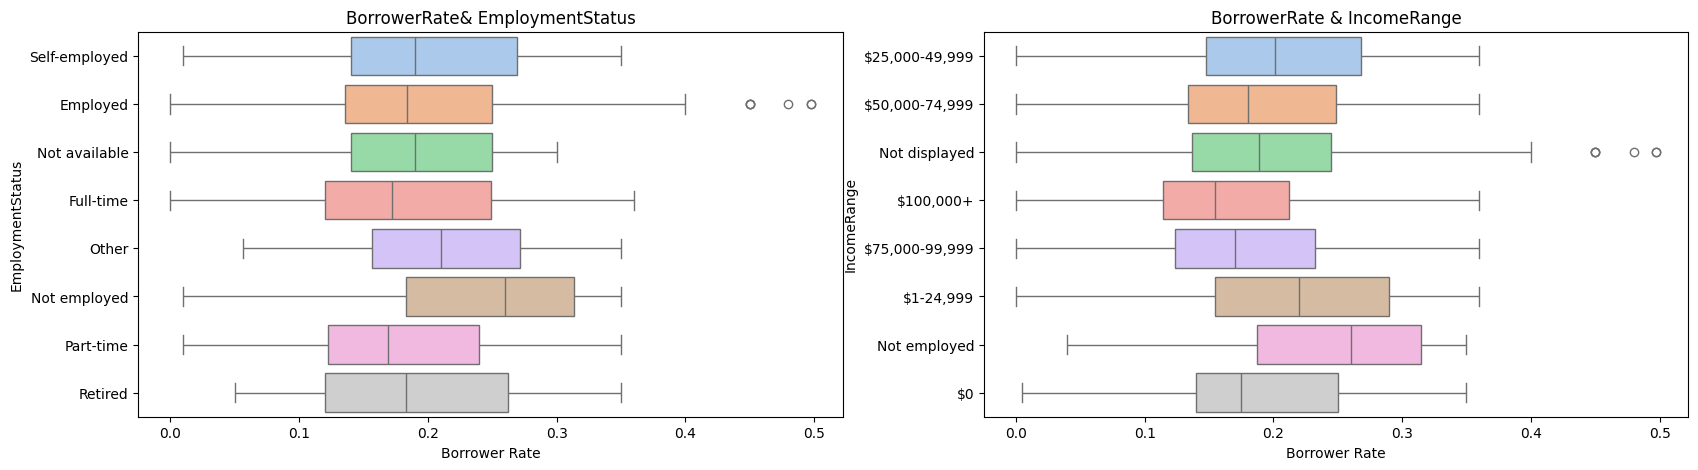

In [133]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=data,x='BorrowerRate',y='EmploymentStatus',palette="pastel")
plt.xlabel('Borrower Rate')
plt.ylabel('EmploymentStatus')
plt.title('BorrowerRate& EmploymentStatus')

plt.subplot(1, 2, 2)
sns.boxplot(data=data,x='BorrowerRate',y='IncomeRange',palette="pastel")
plt.xlabel('Borrower Rate')
plt.ylabel('IncomeRange')
plt.title('BorrowerRate & IncomeRange')



The graph between Borrower rate against employment status and income range shows that the rate is high for not employed and moderate for all employed with high income range.

<ipython-input-134-46660f268690>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='MonthlyLoanPayment',y='EmploymentStatus',palette="pastel")
<ipython-input-134-46660f268690>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='BorrowerRate',y='CreditGrade',palette="pastel")


Text(0.5, 1.0, 'BorrowerRate & CreditGrade')

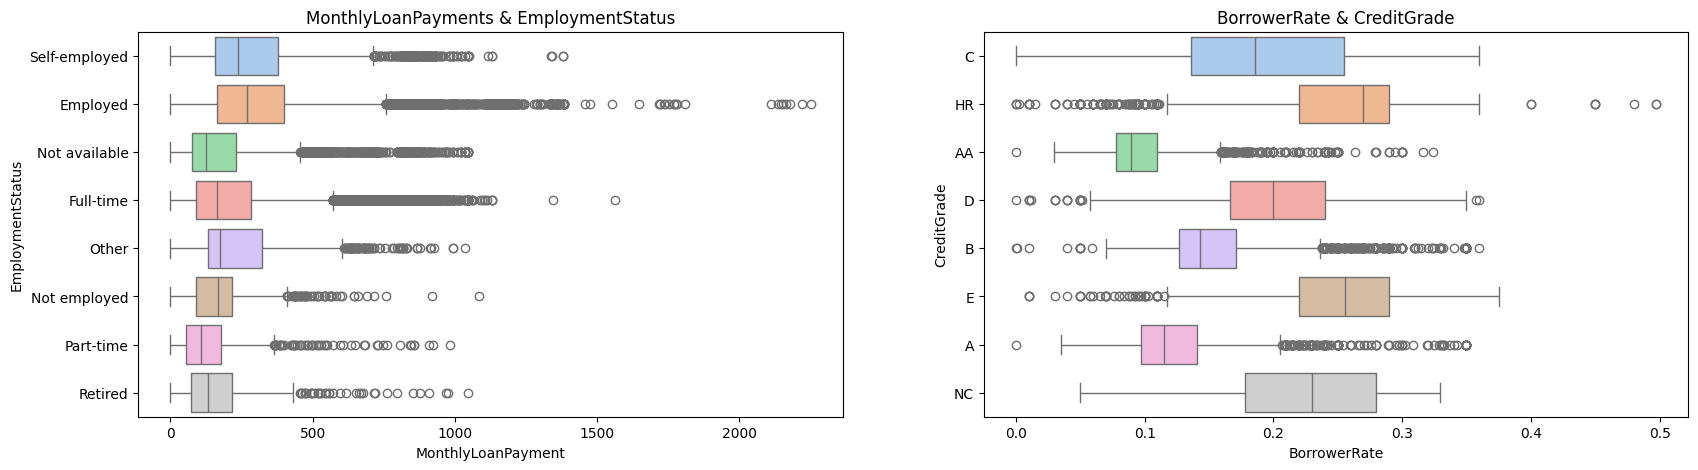

In [134]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=data,x='MonthlyLoanPayment',y='EmploymentStatus',palette="pastel")
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('EmploymentStatus')
plt.title('MonthlyLoanPayments & EmploymentStatus')

plt.subplot(1, 2, 2)
sns.boxplot(data=data,x='BorrowerRate',y='CreditGrade',palette="pastel")
plt.xlabel('BorrowerRate')
plt.ylabel('CreditGrade')
plt.title('BorrowerRate & CreditGrade')

The graph between monthly loan payments shows that employed and self employed has more monthly loan payments also the gredit grade is C

<Axes: xlabel='BorrowerRate', ylabel='Count'>

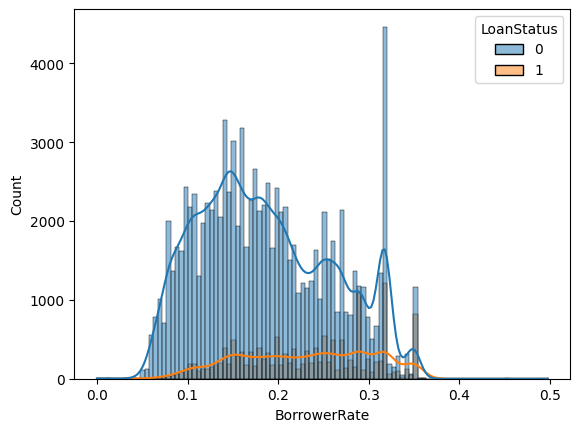

In [135]:
sns.histplot(x='BorrowerRate', hue = "LoanStatus", data = data,kde=True)

The above plot infers the low interest rate people have completed the loan when comparing to the people having higher interest rate.

<Axes: xlabel='BorrowerRate', ylabel='Count'>

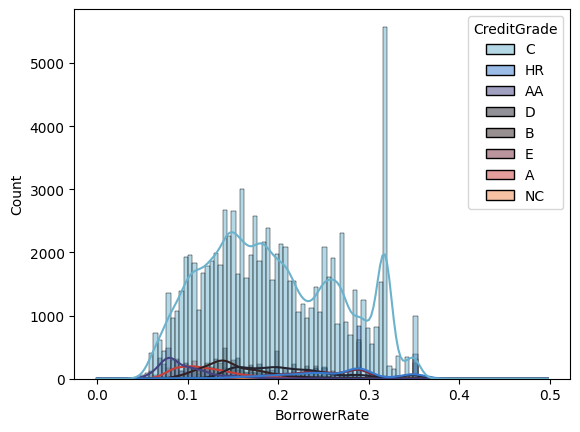

In [136]:
sns.histplot(x='BorrowerRate', hue = "CreditGrade", data = data,kde=True,palette="icefire")

The above plot infers many have lowest grade 'C' having higher interest rate.

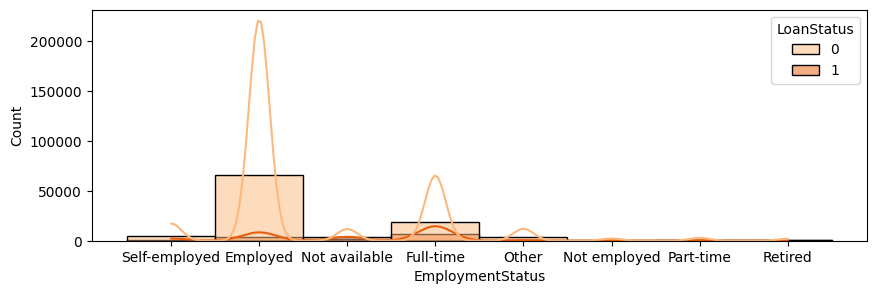

In [137]:
plt.figure(figsize=(10,3))
sns.histplot(x='EmploymentStatus', hue = "LoanStatus", data = data,kde=True,palette="Oranges")
plt.show()

### **Multivariate Data Analysis**

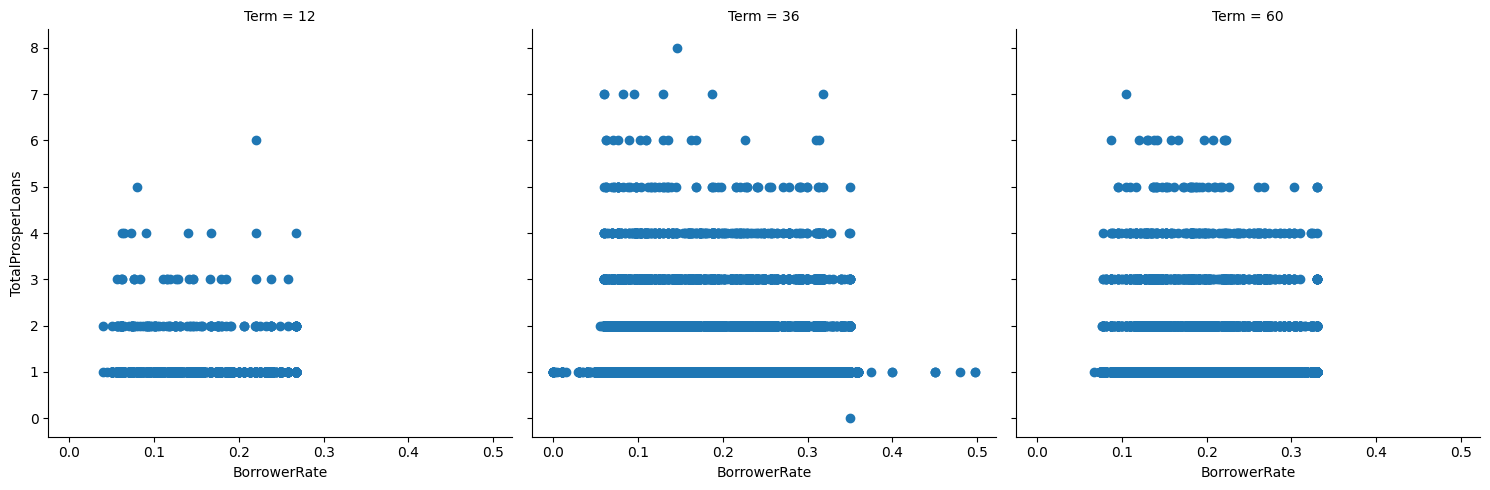

In [138]:
fig=sns.FacetGrid(data = data, col = 'Term', height = 5,
                margin_titles = True)
fig.map(plt.scatter, 'BorrowerRate', 'TotalProsperLoans')


The graph between the total prosper loans and borrower rate based on term shows that for 3 years and 5 years term has more loans comparing to 1 year term.

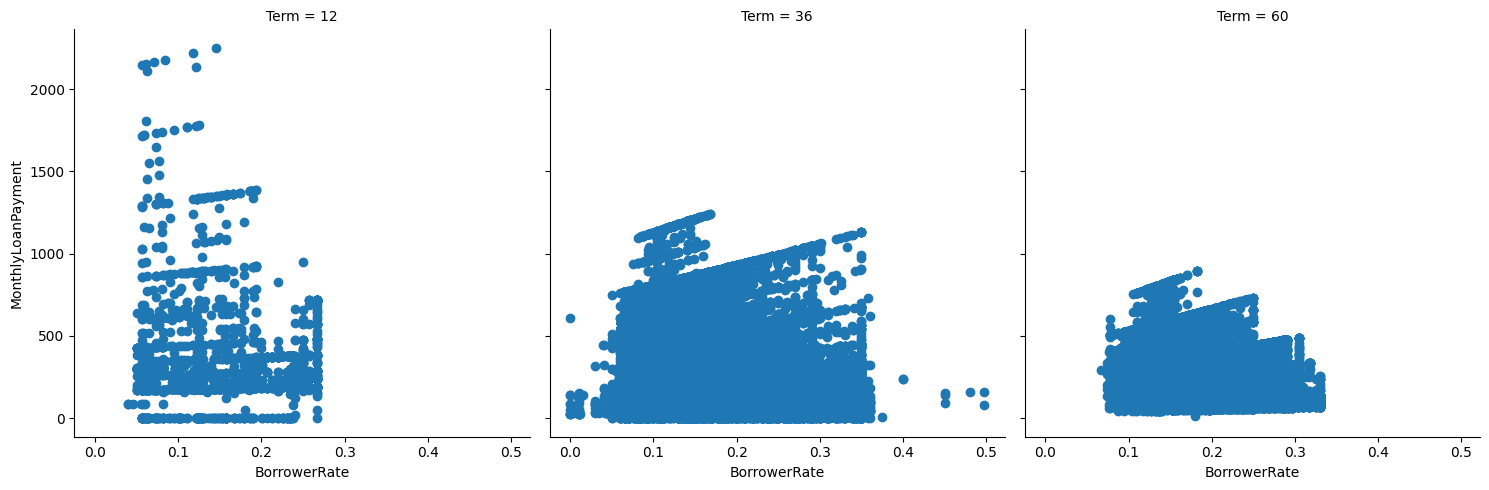

In [139]:
fig=sns.FacetGrid(data = data, col = 'Term', height = 5,
                margin_titles = True)
fig.map(plt.scatter, 'BorrowerRate', 'MonthlyLoanPayment')

From the graph the loan taken for 1 year has done more monthly payments. The loan for 5 year term shows less monthly payments.

**HEATMAP**

<Axes: >

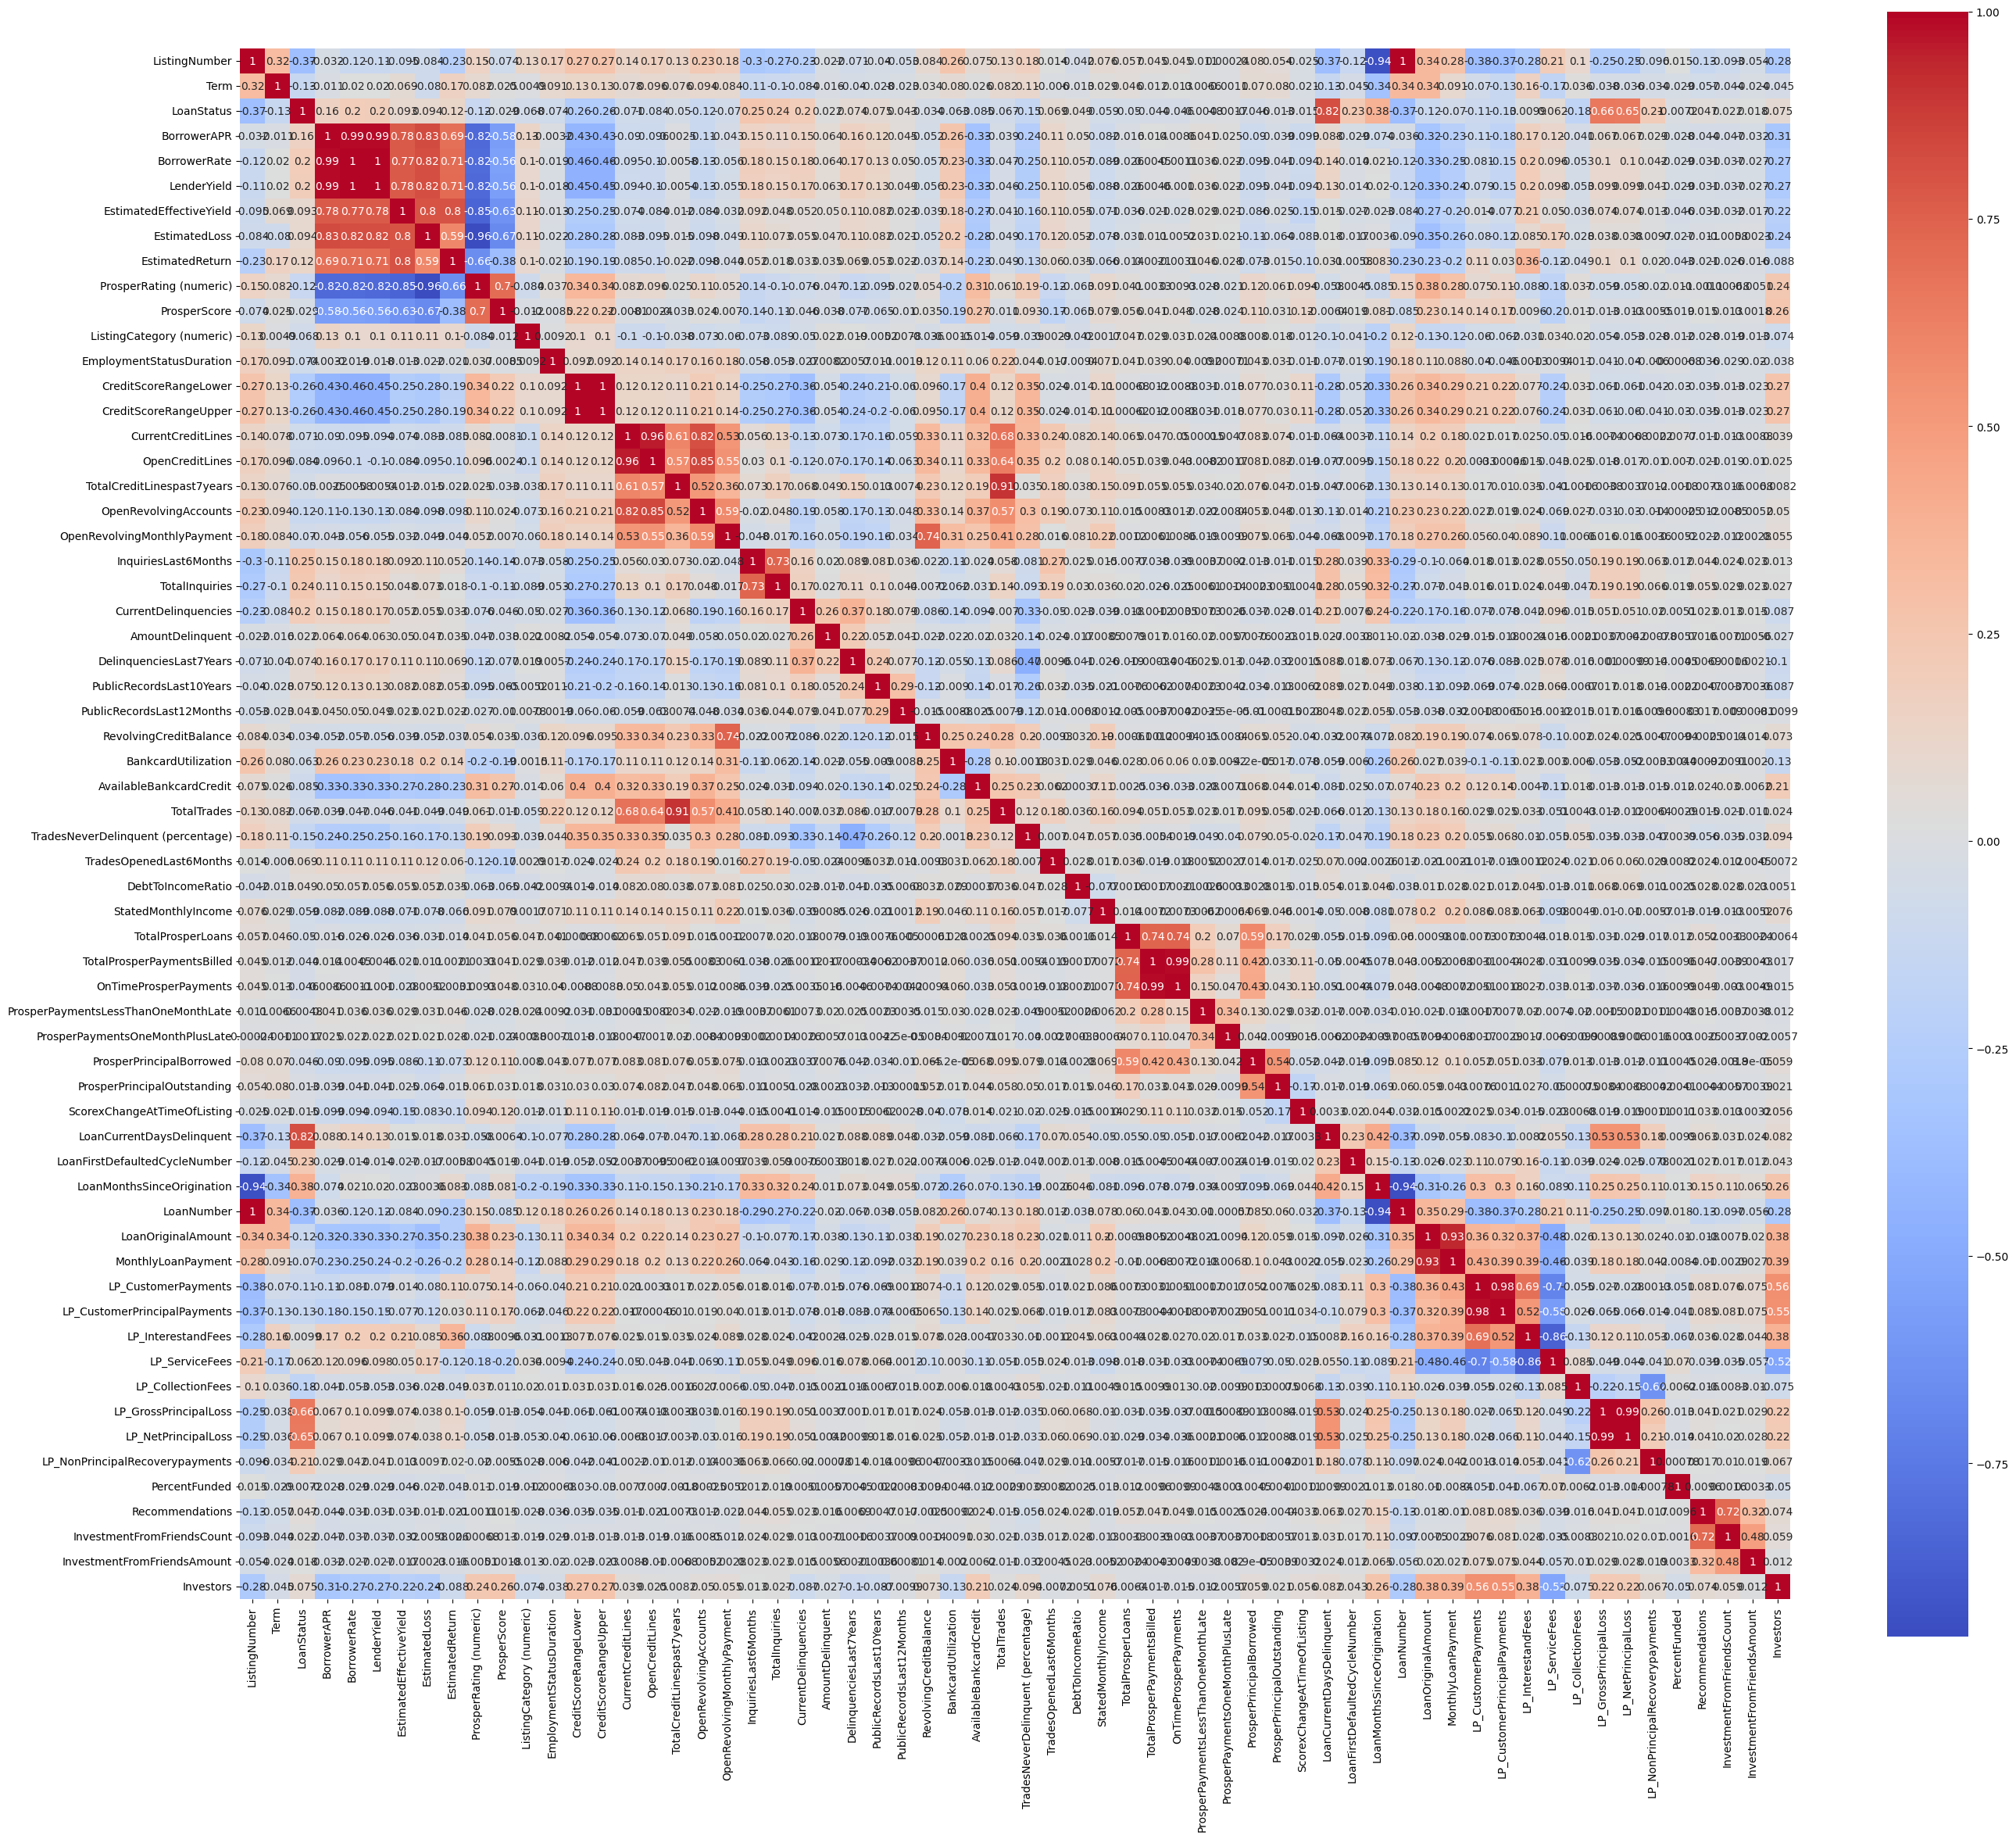

In [140]:
correlations= data_numeric.corr()
plt.figure(figsize=(32,27))
sns.heatmap(correlations,cbar=True,square=True,annot=True,cmap='coolwarm')

The above map implies

1.Lp gross Principal loss and Lp Net principal loss have high effect on loan status.

2.Loan number and Listing number are highly Correlated.

3.Total Trades,Total credit Lines past 7 years are highly correlated.

4.LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayments are depends on the Prosper rating and prosper score.

5.CreditScore upper and lower range depends on monthly loan payments,Lp_customerPayments,Lp_customerprincipalpayments and loan original amount.

In [141]:
# Separate columns into continuous and categorical
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns.tolist()


In [142]:
continuous_columns

['ListingNumber',
 'Term',
 'LoanStatus',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrinci

In [143]:
categorical_columns

['ListingKey',
 'ListingCreationDate',
 'CreditGrade',
 'ClosedDate',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'IncomeRange',
 'IncomeVerifiable',
 'LoanKey',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey']

In [144]:
# Define the columns to drop
'''columns_to_drop = ['ListingKey', 'ListingNumber', 'ListingCreationDate',
                   'DateCreditPulled', 'LoanKey', 'LoanOriginationDate',
                   'LoanOriginationQuarter', 'MemberKey']

# Drop the columns
data.drop(columns=columns_to_drop, inplace=True)
'''

"columns_to_drop = ['ListingKey', 'ListingNumber', 'ListingCreationDate',\n                   'DateCreditPulled', 'LoanKey', 'LoanOriginationDate',\n                   'LoanOriginationQuarter', 'MemberKey']\n\n# Drop the columns\ndata.drop(columns=columns_to_drop, inplace=True)\n"

In [145]:
data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36           0  2009-08-14 00:00:00      0.16516   
1           C    36           0                  NaN      0.12016   
2          HR    36           0  2009-12-17 00:00:00      0.28269   
3           C    36           0                  NaN      0.12528   
4           C    36           0                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                  0.16150         0.0724   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                  0.16150         0.0724   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0          0.09170                      4.0                     C   
1          0.05470                      6.0                     A   
2          0.09170                      4.0                     C   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           6.0                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           6.0                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                      67.0                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  \
0                  640.0                  659.0                 5.0   
1                  680.0                  699.0                14.0   
2                  480.0                  499.0                10.0   
3                  800.0                  819.0                 5.0   
4                  680.0                  699.0                19.0   

   OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
0         4.000000                        12.0                      1   
1        14.000000                        29.0                     13   
2         9.260164                         3.0                      0   
3         5.000000                        29.0                      7   
4        19.000000                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                

In [146]:
data.LoanStatus.value_counts()

LoanStatus
0    98849
1    15063
Name: count, dtype: int64

In [147]:
# Drop the 'GroupKey' column
data.drop(columns=['GroupKey'], inplace=True)


**LABEL ENCODING**

In [148]:
from sklearn.preprocessing import LabelEncoder


LE = LabelEncoder()

cols = ["CreditGrade",'ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','DateCreditPulled','IncomeRange','LoanKey','LoanOriginationQuarter',
       'MemberKey',"ListingKey","IsBorrowerHomeowner","CurrentlyInGroup","IncomeVerifiable"]

data[cols] = data[cols].apply(LabelEncoder().fit_transform)



In [149]:
data.head()

ListingKey  ListingNumber            ListingCreationDate  CreditGrade  \
0        7176         193129  2007-08-26 19:09:29.263000000            3   
1        7189        1209647  2014-02-27 08:28:07.900000000            3   
2        6643          81716  2007-01-05 15:00:47.090000000            6   
3        6665         658116  2012-10-22 11:02:35.010000000            3   
4        6682         909464  2013-09-14 18:38:39.097000000            3   

   Term  LoanStatus  ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
0    36           0        1126      0.16516        0.1580       0.1380   
1    36           0        2792      0.12016        0.0920       0.0820   
2    36           0        1251      0.28269        0.2750       0.2400   
3    36           0        2792      0.12528        0.0974       0.0874   
4    36           0        2792      0.24614        0.2085       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                  0.16150         0.0724          0.09170   
1                  0.07960         0.0249          0.05470   
2                  0.16150         0.0724          0.09170   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   

   ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                      4.0                      3           6.0   
1                      6.0                      0           7.0   
2                      4.0                      3           6.0   
3                      6.0                      0           9.0   
4                      3.0                      4           4.0   

   ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                          0              5          35                 7   
1                          2              5          41                 0   
2                          0             10          35                 2   
3                         16             10          50                 0   
4                          2             23          19                 0   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                       2.0                    1                 1   
1                      44.0                    0                 0   
2                      67.0                    0                 1   
3                     113.0                    1                 0   
4                      44.0                    1                 0   

   DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
0             14321                  640.0                  659.0   
1            111857                  680.0                  699.0   
2              6420                  480.0                  499.0   
3             64698                  800.0                  819.0   
4             85831                  680.0                  699.0   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0         4.000000                        12.0   
1                14.0        14.000000                        29.0   
2                10.0         9.260164                         3.0   
3                 5.0         5.000000                        29.0   
4                19.0        19.000000                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0                      1                         24.0                   3.0   
1                     13                        389.0                   3.0   
2                      0                          0.0                   0.0   
3                      7                        115.0                   0.0   
4                      6                        220.0                   1.0   

   TotalInquiries  CurrentDelinquencies  AmountDelinquent  \
0             3.0                   2.0        472.000000   
1 

### **FEATURE SELECTION:**Feature selection is nothing but a selection of required independent features. Selecting the important independent features which have more relation with the dependent feature will help to build a good model

In [150]:
x= data.drop(columns=['LoanStatus','LoanOriginationDate','ListingCreationDate',"ListingNumber"] ,axis=1)
y= data['LoanStatus']

From the dataset,loanstatus is the target column considered as 'y' and in 'x' certain columns are dropped like 'LoanOriginationDate','GroupKey','ListingCreationDate','ListingNumber'.

In [151]:
data.isnull().sum().sum()

0

In [152]:
data.head()

ListingKey  ListingNumber            ListingCreationDate  CreditGrade  \
0        7176         193129  2007-08-26 19:09:29.263000000            3   
1        7189        1209647  2014-02-27 08:28:07.900000000            3   
2        6643          81716  2007-01-05 15:00:47.090000000            6   
3        6665         658116  2012-10-22 11:02:35.010000000            3   
4        6682         909464  2013-09-14 18:38:39.097000000            3   

   Term  LoanStatus  ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
0    36           0        1126      0.16516        0.1580       0.1380   
1    36           0        2792      0.12016        0.0920       0.0820   
2    36           0        1251      0.28269        0.2750       0.2400   
3    36           0        2792      0.12528        0.0974       0.0874   
4    36           0        2792      0.24614        0.2085       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                  0.16150         0.0724          0.09170   
1                  0.07960         0.0249          0.05470   
2                  0.16150         0.0724          0.09170   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   

   ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                      4.0                      3           6.0   
1                      6.0                      0           7.0   
2                      4.0                      3           6.0   
3                      6.0                      0           9.0   
4                      3.0                      4           4.0   

   ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                          0              5          35                 7   
1                          2              5          41                 0   
2                          0             10          35                 2   
3                         16             10          50                 0   
4                          2             23          19                 0   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                       2.0                    1                 1   
1                      44.0                    0                 0   
2                      67.0                    0                 1   
3                     113.0                    1                 0   
4                      44.0                    1                 0   

   DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
0             14321                  640.0                  659.0   
1            111857                  680.0                  699.0   
2              6420                  480.0                  499.0   
3             64698                  800.0                  819.0   
4             85831                  680.0                  699.0   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0         4.000000                        12.0   
1                14.0        14.000000                        29.0   
2                10.0         9.260164                         3.0   
3                 5.0         5.000000                        29.0   
4                19.0        19.000000                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0                      1                         24.0                   3.0   
1                     13                        389.0                   3.0   
2                      0                          0.0                   0.0   
3                      7                        115.0                   0.0   
4                      6                        220.0                   1.0   

   TotalInquiries  CurrentDelinquencies  AmountDelinquent  \
0             3.0                   2.0        472.000000   
1 

In [153]:
# Save the DataFrame as a CSV file
#data.to_csv('cleaned_data.csv', index=False)

#from google.colab import files
#files.download('cleaned_data.csv')


In [154]:
from imblearn.over_sampling import SMOTE

In [155]:
sm = SMOTE(sampling_strategy=.40,random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(x, y)

In [156]:
y_train_resample.value_counts()

LoanStatus
0    98849
1    39539
Name: count, dtype: int64

In [157]:
y_train_resample.value_counts(normalize=True)

LoanStatus
0    0.714289
1    0.285711
Name: proportion, dtype: float64

In [158]:
# Orginal Shape of DataSet
print(x.shape)
print(y.shape)
# After Resampling with Somte
print(X_train_resample.shape)
print(y_train_resample.shape)

(113912, 75)
(113912,)
(138388, 75)
(138388,)


In [159]:
x = X_train_resample
x.head()

ListingKey  CreditGrade  Term  ClosedDate  BorrowerAPR  BorrowerRate  \
0        7176            3    36        1126      0.16516        0.1580   
1        7189            3    36        2792      0.12016        0.0920   
2        6643            6    36        1251      0.28269        0.2750   
3        6665            3    36        2792      0.12528        0.0974   
4        6682            3    36        2792      0.24614        0.2085   

   LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0       0.1380                  0.16150         0.0724          0.09170   
1       0.0820                  0.07960         0.0249          0.05470   
2       0.2400                  0.16150         0.0724          0.09170   
3       0.0874                  0.08490         0.0249          0.06000   
4       0.1985                  0.18316         0.0925          0.09066   

   ProsperRating (numeric)  ProsperRating (Alpha)  ProsperScore  \
0                      4.0                      3           6.0   
1                      6.0                      0           7.0   
2                      4.0                      3           6.0   
3                      6.0                      0           9.0   
4                      3.0                      4           4.0   

   ListingCategory (numeric)  BorrowerState  Occupation  EmploymentStatus  \
0                          0              5          35                 7   
1                          2              5          41                 0   
2                          0             10          35                 2   
3                         16             10          50                 0   
4                          2             23          19                 0   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
0                       2.0                    1                 1   
1                      44.0                    0                 0   
2                      67.0                    0                 1   
3                     113.0                    1                 0   
4                      44.0                    1                 0   

   DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
0             14321                  640.0                  659.0   
1            111857                  680.0                  699.0   
2              6420                  480.0                  499.0   
3             64698                  800.0                  819.0   
4             85831                  680.0                  699.0   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0         4.000000                        12.0   
1                14.0        14.000000                        29.0   
2                10.0         9.260164                         3.0   
3                 5.0         5.000000                        29.0   
4                19.0        19.000000                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0                      1                         24.0                   3.0   
1                     13                        389.0                   3.0   
2                      0                          0.0                   0.0   
3                      7                        115.0                   0.0   
4                      6                        220.0                   1.0   

   TotalInquiries  CurrentDelinquencies  AmountDelinquent  \
0             3.0                   2.0        472.000000   
1             5.0                   0.0          0.000000   
2             1.0                   1.0        984.507059   
3             1.0                   4.0      10056.000000   
4             9.0                   0.0          0.000000   

   DelinquenciesLast7Years  PublicRecordsLast10Years  \
0                      4.0                       0.0   
1                      0

In [160]:
y = y_train_resample
y.head()

0    0
1    0
2    0
3    0
4    0
Name: LoanStatus, dtype: int64

# **MODEL BUILDING**

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [162]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [163]:
len(x_train), len(x_test), len(y_train), len(y_test)

(96871, 41517, 96871, 41517)

In [164]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [165]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(x_test_scaled)

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression
Accuracy: 0.9980008189416384
Confusion Matrix:
 [[29620    73]
 [   10 11814]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29693
           1       0.99      1.00      1.00     11824

    accuracy                           1.00     41517
   macro avg       1.00      1.00      1.00     41517
weighted avg       1.00      1.00      1.00     41517



In [166]:
#Logistic Regression
#Accuracy: 0.9987417334815942
#Confusion Matrix:
# [[29623    20]
# [   23  4508]]

In [167]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)

# Predictions
y_pred_nb = nb.predict(x_test_scaled)

# Evaluation
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes
Accuracy: 0.9415901919695546
Confusion Matrix:
 [[27290  2403]
 [   22 11802]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     29693
           1       0.83      1.00      0.91     11824

    accuracy                           0.94     41517
   macro avg       0.92      0.96      0.93     41517
weighted avg       0.95      0.94      0.94     41517



In [168]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [169]:
from sklearn.ensemble import AdaBoostClassifier

In [170]:
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [172]:
y_pred = adaboost_model.predict(x_test)
adaboost_accuracy = accuracy_score(y_test, y_pred)

print(f"AdaBoost Model Accuracy: {adaboost_accuracy:.2f}")

AdaBoost Model Accuracy: 1.00


In [177]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
print ("ADABOOST SCORES ---->>>>")
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

# F1 Score
f1_score_value = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1_score_value:.2f}")

# Precision
precision_value = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision_value:.2f}")

# Recall
recall_value = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall_value:.2f}")

print(f"AdaBoost Model Accuracy: {adaboost_accuracy:.2f}")

ADABOOST SCORES ---->>>>
Confusion Matrix:
 [[29693     0]
 [    0 11824]]
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
AdaBoost Model Accuracy: 1.00


In [182]:
# Initialize SVM classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model
svm_clf.fit(x_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_clf.predict(x_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm:.2f}')



SVM Model Accuracy: 1.00


In [184]:
y_pred_svm = svm_clf.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9994219235493894


In [ ]:
y_pred_svm = svm_clf.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

In [185]:
print ("SVM SCORES ---->>>>")
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", confusion_mat)

# F1 Score
f1_score_value = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1_score_value:.2f}")

# Precision
precision_value = precision_score(y_test, y_pred_svm, average='weighted')
print(f"Precision: {precision_value:.2f}")

# Recall
recall_value = recall_score(y_test, y_pred_svm, average='weighted')
print(f"Recall: {recall_value:.2f}")

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM SCORES ---->>>>
Confusion Matrix:
 [[29679    14]
 [   10 11814]]
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
SVM Accuracy: 0.9994219235493894


In [188]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [190]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Initialize GridSearchCV with SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best estimator
best_svm_clf = grid_search.best_estimator_

# Predict using the best SVM model
y_pred_svm = best_svm_clf.predict(x_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy with GridSearchCV: {accuracy_svm:.2f}')
print(f'Best Parameters: {grid_search.best_params_}')